In [1]:
!ls

NGC-DL-CONTAINER-LICENSE    dev   lib32   mnt	run   tmp	workspace
bin			    etc   lib64   opt	sbin  usr
boot			    home  libx32  proc	srv   var
cuda-keyring_1.1-1_all.deb  lib   media   root	sys   vc.ipynb


In [4]:
!pip install cmake

  Using cached cmake-3.31.1-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (27.8 MB)


In [8]:
!apt update
!apt install -y build-essential cmake libopenblas-dev liblapack-dev libx11-dev
!apt install -y python3-dev python3-pip python3-venv
!apt install -y libjpeg-dev libpng-dev


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Reading package lists... Done3m
Building dependency tree... Done
Reading state information... Done
34 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
build-essential set to manually installed.
The following additional packages will be installed:
  cmake-data dh-elpa-helper emacsen-common libarchive13 libblas-dev libblas3
  libgfortran5 libjsoncpp25 liblapack3 libopenblas-pthread-dev libopenblas0
  libopenblas0-pthread libpthread-stubs0-dev librhash0 libuv1 libx11-6
  libx11-data

In [21]:
!pip install face_recognition opencv_python gdown torch torchvision scikit-learn

  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (41.2 MB)


In [17]:
!apt-get install unzip
!apt-get install ffmpeg libsm6 libxext6  -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  alsa-topology-conf alsa-ucm-conf fontconfig fontconfig-config
  fonts-dejavu-core i965-va-driver intel-media-va-driver libaacs0 libaom3
  libasound2 libasound2-data libass9 libasyncns0 libavc1394-0 libavcodec58
  libavdevice58 libavfilter7 libavformat58 libavutil56 libbdplus0 libbluray2
  libbs2b0 libcaca0 libcairo-gobject2 libcairo2 libcdio-cdda2
  libcdio-paranoia2 libcdio19 libchromaprint1 libcodec2-1.0 libdatrie1
  libdav1d5 libdc1394-25 libdecor-0-0 libdecor-0-plugin-1-cairo libdeflate0
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libflac8 libflite1 libfontconfig1 libfreetype6 li

In [13]:
!gdown --id 1GsJnHzkHrQKBDP_vsC2y6pVivi7vjyBA
!unzip Celeb-DF.zip


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GsJnHzkHrQKBDP_vsC2y6pVivi7vjyBA
From (redirected): https://drive.google.com/uc?id=1GsJnHzkHrQKBDP_vsC2y6pVivi7vjyBA&confirm=t&uuid=d3ccecce-747f-42f4-b19b-730000860731
To: /Celeb-DF.zip
100%|███████████████████████████████████████| 2.12G/2.12G [00:15<00:00, 140MB/s]
Archive:  Celeb-DF.zip
   creating: Celeb-real/
  inflating: Celeb-real/id0_0000.mp4  
  inflating: Celeb-real/id0_0001.mp4  
  inflating: Celeb-real/id0_0002.mp4  
  inflating: Celeb-real/id0_0003.mp4  
  inflating: Celeb-real/id0_0004.mp4  
  inflating: Celeb-real/id0_0005.mp4  
  inflating: Celeb-real/id0_0006.mp4  
  inflating: Celeb-real/id0_0007.mp4  
  inflating: Celeb-real/id0_0008.mp4  
  inflating: Celeb-real/id0_0009.mp4  
  inflati

In [15]:
print("finish download and extract")

finish download and extract


In [1]:
import cv2
import os
import glob
import torch
import face_recognition
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from multiprocessing import Pool, cpu_count
from concurrent.futures import ThreadPoolExecutor, as_completed
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torchvision import models
from torch import nn

In [2]:
import cv2
import os
import glob
import torch
import face_recognition
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from multiprocessing import Pool, cpu_count
from concurrent.futures import ThreadPoolExecutor, as_completed
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torch
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torchvision import models
from torch import nn
# Utility Functions for Video Processing
def frame_extract(video_path, output_dir, frame_rate=1):
    """
    Extract frames from a video at specified frame rate
    
    Args:
        video_path (str): Path to input video
        output_dir (str): Directory to save extracted frames
        frame_rate (int): Number of frames to extract per second
    """
    os.makedirs(output_dir, exist_ok=True)
    vid_cap = cv2.VideoCapture(video_path)
    success, image = vid_cap.read()
    count = 0
    fps = int(vid_cap.get(cv2.CAP_PROP_FPS))
    interval = max(1, fps // frame_rate)

    while success:
        if count % interval == 0:
            frame_name = os.path.join(output_dir, f"frame_{count}.jpg")
            cv2.imwrite(frame_name, image)
        success, image = vid_cap.read()
        count += 1

    vid_cap.release()
    print(f"Saved {count // interval} frames to {output_dir}")

def extract_faces(frame_dir, output_dir, face_size=(112, 112)):
    """
    Extract faces from video frames
    
    Args:
        frame_dir (str): Directory containing video frames
        output_dir (str): Directory to save extracted faces
        face_size (tuple): Desired size of extracted faces
    """
    os.makedirs(output_dir, exist_ok=True)
    frame_files = sorted([os.path.join(frame_dir, f) for f in os.listdir(frame_dir) if f.endswith('.jpg')])

    for frame_file in frame_files:
        image = cv2.imread(frame_file)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        face_locations = face_recognition.face_locations(rgb_image)

        for idx, (top, right, bottom, left) in enumerate(face_locations):
            face = rgb_image[top:bottom, left:right]
            face = cv2.resize(face, face_size)
            face_path = os.path.join(output_dir, f"{os.path.basename(frame_file).split('.')[0]}_face_{idx}.jpg")
            cv2.imwrite(face_path, cv2.cvtColor(face, cv2.COLOR_RGB2BGR))

    print(f"Faces saved to {output_dir}")

def save_face_video(face_dir, output_video_path, fps=30, size=(112, 112)):
    """
    Create a video from extracted face images
    
    Args:
        face_dir (str): Directory containing face images
        output_video_path (str): Path to save output video
        fps (int): Frames per second
        size (tuple): Video frame size
    """
    frame_files = sorted([os.path.join(face_dir, f) for f in os.listdir(face_dir) if f.endswith('.jpg')])
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'MP4V'), fps, size)

    for frame_file in frame_files:
        frame = cv2.imread(frame_file)
        out.write(frame)
    out.release()
    print(f"Face video saved to {output_video_path}")

def process_video(video):
    """
    Process a single video: extract frames, faces, and save
    
    Args:
        video (str): Path to input video
    """
    video_name = os.path.splitext(os.path.basename(video))[0]
    frame_dir = f'frames/{video_name}'
    face_dir = f'faces/{video_name}'
    processed_video_path = f'processed_videos/{video_name}.mp4'

    os.makedirs('frames', exist_ok=True)
    os.makedirs('faces', exist_ok=True)
    os.makedirs('processed_videos', exist_ok=True)

    frame_extract(video, frame_dir)  # Extract frames
    extract_faces(frame_dir, face_dir)  # Extract faces
    save_face_video(face_dir, processed_video_path)  # Save face video

def parallel_video_processing(videos):
    """
    Process videos in parallel using multiprocessing
    
    Args:
        videos (list): List of video paths
    """
    num_cores = cpu_count()
    with Pool(num_cores) as pool:
        pool.map(process_video, videos)

class VideoDataset(Dataset):
    def __init__(self, video_paths, labels, transform=None, num_frames=16):
        self.video_paths = video_paths
        self.labels = labels
        self.transform = transform or transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((112, 112)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                 std=[0.229, 0.224, 0.225])
        ])
        self.num_frames = num_frames

    def __getitem__(self, idx):
        video_path = self.video_paths[idx]
        label = self.labels[idx]

        frames = []
        cap = cv2.VideoCapture(video_path)
        success, frame = cap.read()
        while success:
            frame = self.transform(frame)
            frames.append(frame)
            success, frame = cap.read()
        cap.release()

        # Pad or truncate frames to a fixed length
        if len(frames) > self.num_frames:
            frames = frames[:self.num_frames]
        else:
            # Pad with zero-frames if too short
            while len(frames) < self.num_frames:
                frames.append(torch.zeros_like(frames[0]))

        return torch.stack(frames), label

    def __len__(self):
        return len(self.video_paths)


In [4]:
class DeepfakeModel(nn.Module):
    def __init__(self, num_classes=2, lstm_hidden_dim=2048, lstm_layers=1, bidirectional=False):
        super(DeepfakeModel, self).__init__()

        # ResNext50 Feature Extractor
        base_model = models.resnext50_32x4d(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # LSTM for Temporal Modeling
        feature_dim = 2048  # Output dimension of ResNext50
        self.lstm = nn.LSTM(input_size=feature_dim,
                            hidden_size=lstm_hidden_dim,
                            num_layers=lstm_layers,
                            batch_first=True,
                            bidirectional=bidirectional)

        # Fully Connected Layer for Classification
        lstm_output_dim = lstm_hidden_dim * (2 if bidirectional else 1)
        self.fc = nn.Linear(lstm_output_dim, num_classes)

    def forward(self, x):
        """
        Forward pass for Deepfake Detection Model.
        x: Input tensor of shape (batch_size, seq_len, c, h, w)
        """
        batch_size, seq_len, c, h, w = x.size()
        x = x.view(batch_size * seq_len, c, h, w)
        x = self.feature_extractor(x)  # Feature extraction
        x = self.avgpool(x)
        x = x.view(batch_size, seq_len, -1)

        # Pass through LSTM
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]  # Take output from the last time step

        # Classification
        out = self.fc(lstm_out)
        return out


In [9]:
# Detect available device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [10]:
import os
import json
import glob

def create_label_dictionary_for_processed_videos(processed_videos_dir, original_label_dict):
    """
    Create a label dictionary for processed face videos
    """
    face_videos = glob.glob(os.path.join(processed_videos_dir, '*.mp4'))
    
    face_video_labels = {}
    for video_path in face_videos:
        # Lấy tên video gốc (trước khi xử lý face)
        original_name = os.path.splitext(os.path.basename(video_path))[0]
        
        # Tra label từ từ điển gốc
        if original_name in original_label_dict:
            face_video_labels[os.path.basename(video_path)] = original_label_dict[original_name]
    
    return face_video_labels

def save_label_dictionary(label_dict, output_path='processed_video_labels.json'):
    """
    Save label dictionary for processed videos to a JSON file
    """
    with open(output_path, 'w') as f:
        json.dump(label_dict, f)
    print(f"Processed video labels saved to {output_path}")

def load_label_dictionary(input_path='processed_video_labels.json'):
    """
    Load label dictionary for processed videos from a JSON file
    """
    if os.path.exists(input_path):
        with open(input_path, 'r') as f:
            return json.load(f)
    return None

# Trong quá trình xử lý video
base_path = '/'

# Tạo từ điển label gốc
original_label_dict = {}
real_videos = (
    glob.glob(os.path.join(base_path, 'Celeb-real', '*.mp4')) + 
    glob.glob(os.path.join(base_path, 'YouTube-real', '*.mp4'))
)
fake_videos = glob.glob(os.path.join(base_path, 'Celeb-synthesis', '*.mp4'))

for v in real_videos:
    video_name = os.path.splitext(os.path.basename(v))[0]
    original_label_dict[video_name] = 1  # real
for v in fake_videos:
    video_name = os.path.splitext(os.path.basename(v))[0]
    original_label_dict[video_name] = 0  # fake

# Thực hiện song song việc xử lý video
parallel_video_processing(all_videos)

# Tạo và lưu labels cho các video face đã xử lý
processed_videos_dir = 'processed_videos'
processed_video_labels = create_label_dictionary_for_processed_videos(processed_videos_dir, original_label_dict)
save_label_dictionary(processed_video_labels)

# Sử dụng labels đã lưu cho việc chia tập train/test
processed_videos = glob.glob('processed_videos/*.mp4')
processed_names = [os.path.basename(p) for p in processed_videos]
processed_labels = [processed_video_labels[name] for name in processed_names]

Saved 7 frames to frames/id10_0000
Saved 10 frames to frames/id1_0007
Saved 12 frames to frames/id11_0000Saved 9 frames to frames/id16_0011Saved 11 frames to frames/id17_0002


Saved 9 frames to frames/id7_0002
Saved 7 frames to frames/id16_0006
Saved 9 frames to frames/id17_0007
Saved 13 frames to frames/id1_0002Saved 10 frames to frames/id11_0005Saved 10 frames to frames/id16_0001


Saved 12 frames to frames/id3_0007
Saved 11 frames to frames/id12_0004
Saved 11 frames to frames/00137
Saved 15 frames to frames/id2_0007
Saved 14 frames to frames/id3_0002Saved 12 frames to frames/id2_0002

Saved 11 frames to frames/id11_0010Saved 9 frames to frames/00017
Saved 14 frames to frames/id4_0007
Saved 13 frames to frames/id7_0007

Saved 10 frames to frames/id10_0005
Saved 15 frames to frames/00037Saved 16 frames to frames/id4_0002Saved 15 frames to frames/00022


Saved 15 frames to frames/00052
Saved 15 frames to frames/00082Saved 12 frames to frames/00042

Saved 15 frames to frames/id9_0007
S

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_0007
Face video saved to processed_videos/id1_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id10_0000
Face video saved to processed_videos/id10_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 4 frames to frames/id10_0001
Saved 10 frames to frames/id16_0012
Faces saved to faces/id11_0000
Face video saved to processed_videos/id11_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id1_0008
Faces saved to faces/id17_0002
Face video saved to processed_videos/id17_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 8 frames to frames/id17_0003Faces saved to faces/id16_0006

Face video saved to processed_videos/id16_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id11_0001
Faces saved to faces/id1_0002
Face video saved to processed_videos/id1_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_0002
Face video saved to processed_videos/id7_0002.mp4
Saved 9 frames to frames/id16_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_0002
Face video saved to processed_videos/id2_0002.mp4Faces saved to faces/id17_0007
Faces saved to faces/id3_0007



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id3_0007.mp4Face video saved to processed_videos/id17_0007.mp4

Faces saved to faces/id3_0002
Face video saved to processed_videos/id3_0002.mp4Saved 15 frames to frames/id1_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id11_0010
Face video saved to processed_videos/id11_0010.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id2_0003
Faces saved to faces/00017
Face video saved to processed_videos/00017.mp4Saved 8 frames to frames/id17_0008



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id3_0008
Saved 12 frames to frames/id3_0003
Faces saved to faces/id10_0001
Face video saved to processed_videos/id10_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 18 frames to frames/id7_0003
Faces saved to faces/00137
Face video saved to processed_videos/00137.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_0007
Face video saved to processed_videos/id2_0007.mp4Faces saved to faces/id11_0005

Faces saved to faces/id16_0001Face video saved to processed_videos/id11_0005.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Saved 12 frames to frames/id12_0000Face video saved to processed_videos/id16_0001.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id10_0005
Face video saved to processed_videos/id10_0005.mp4Saved 14 frames to frames/00018



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id10_0002
Faces saved to faces/id12_0004
Face video saved to processed_videos/id12_0004.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id11_0006
Saved 5 frames to frames/id10_0006
Faces saved to faces/id17_0003
Face video saved to processed_videos/id17_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id16_0002
Saved 16 frames to frames/00138
Faces saved to faces/00132
Face video saved to processed_videos/00132.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id17_0004
Faces saved to faces/id8_0007
Saved 17 frames to frames/id2_0008
Face video saved to processed_videos/id8_0007.mp4
Faces saved to faces/00042


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00042.mp4
Saved 10 frames to frames/id12_0005
Faces saved to faces/00122
Face video saved to processed_videos/00122.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_0002
Face video saved to processed_videos/id9_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00012
Face video saved to processed_videos/00012.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_0007
Face video saved to processed_videos/id7_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00157
Face video saved to processed_videos/00157.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00133
Saved 10 frames to frames/00123
Faces saved to faces/id4_0007
Faces saved to faces/00142Face video saved to processed_videos/id4_0007.mp4Faces saved to faces/00022


Saved 15 frames to frames/00043

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00022.mp4

Face video saved to processed_videos/00142.mp4
Faces saved to faces/00032
Faces saved to faces/00082Faces saved to faces/00037Face video saved to processed_videos/00032.mp4


Face video saved to processed_videos/00082.mp4Face video saved to processed_videos/00037.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_0007
Faces saved to faces/id13_0002
Face video saved to processed_videos/id9_0007.mp4
Faces saved to faces/00077Face video saved to processed_videos/id13_0002.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Face video saved to processed_videos/00077.mp4
Faces saved to faces/id10_0006Faces saved to faces/00087


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id10_0006.mp4Face video saved to processed_videos/00087.mp4Saved 9 frames to frames/id7_0008




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 19 frames to frames/id8_0008
Faces saved to faces/00067
Face video saved to processed_videos/00067.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00013
Faces saved to faces/00057Faces saved to faces/00107

Faces saved to faces/00052Face video saved to processed_videos/00107.mp4
Face video saved to processed_videos/00057.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id9_0003Face video saved to processed_videos/00052.mp4

Faces saved to faces/00102
Faces saved to faces/id16_0012
Face video saved to processed_videos/00102.mp4Faces saved to faces/00007

Face video saved to processed_videos/id16_0012.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_0005Face video saved to processed_videos/00007.mp4

Faces saved to faces/00112
Face video saved to processed_videos/id0_0005.mp4Face video saved to processed_videos/00112.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Faces saved to faces/id4_0002
Saved 15 frames to frames/00158
Face video saved to processed_videos/id4_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id4_0008Faces saved to faces/00062

Face video saved to processed_videos/00062.mp4
Faces saved to faces/id13_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00117
Face video saved to processed_videos/00117.mp4Face video saved to processed_videos/id13_0007.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_0008
Saved 15 frames to frames/00033Face video saved to processed_videos/id1_0008.mp4

Saved 11 frames to frames/00083
Saved 15 frames to frames/00038Faces saved to faces/00072Saved 15 frames to frames/00143




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id13_0003Faces saved to faces/00097

Saved 15 frames to frames/00023Faces saved to faces/id0_0000
Face video saved to processed_videos/00072.mp4

Face video saved to processed_videos/00097.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id0_0000.mp4Faces saved to faces/00047
Saved 10 frames to frames/id16_0013


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00027Face video saved to processed_videos/00047.mp4

Faces saved to faces/id13_0012
Face video saved to processed_videos/00027.mp4Faces saved to faces/id2_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id13_0012.mp4

Face video saved to processed_videos/id2_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_0004
Faces saved to faces/00127Face video saved to processed_videos/id17_0004.mp4

Saved 16 frames to frames/00078


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00127.mp4
Faces saved to faces/id16_0007
Saved 16 frames to frames/00088
Face video saved to processed_videos/id16_0007.mp4
Saved 16 frames to frames/id10_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00068Saved 15 frames to frames/id9_0008

Saved 15 frames to frames/00108Faces saved to faces/id17_0008

Face video saved to processed_videos/id17_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00103Faces saved to faces/00147Faces saved to faces/00002


Faces saved to faces/id3_0008Face video saved to processed_videos/00147.mp4Face video saved to processed_videos/00002.mp4




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id3_0008.mp4Saved 13 frames to frames/id1_0009

Saved 15 frames to frames/00053
Saved 15 frames to frames/00008Faces saved to faces/id8_0002

Saved 16 frames to frames/00058Faces saved to faces/00092Face video saved to processed_videos/id8_0002.mp4




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00092.mp4
Saved 16 frames to frames/00113
Faces saved to faces/id1_0003
Faces saved to faces/id3_0003
Saved 14 frames to frames/id4_0003Saved 10 frames to frames/id0_0001
Saved 17 frames to frames/id0_0006
Face video saved to processed_videos/id1_0003.mp4
Face video saved to processed_videos/id3_0003.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00063Saved 14 frames to frames/id2_0004

Saved 15 frames to frames/id13_0008
Saved 15 frames to frames/00118
Saved 15 frames to frames/00098Saved 10 frames to frames/id17_0005

Saved 15 frames to frames/00073
Saved 16 frames to frames/00048
Saved 11 frames to frames/id16_0008
Saved 15 frames to frames/id13_0013
Saved 9 frames to frames/id17_0009
Saved 15 frames to frames/00028
Saved 9 frames to frames/00003
Saved 13 frames to frames/id1_0004
Saved 15 frames to frames/00128
Faces saved to faces/id6_0007
Face video saved to processed_videos/id6_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id3_0004
Saved 13 frames to frames/id8_0003
Saved 15 frames to frames/00148
Saved 16 frames to frames/id3_0009
Saved 16 frames to frames/00093
Faces saved to faces/id11_0001
Face video saved to processed_videos/id11_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_0002
Face video saved to processed_videos/id6_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id6_0008
Faces saved to faces/id10_0002
Face video saved to processed_videos/id10_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id11_0006
Face video saved to processed_videos/id11_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id11_0002
Saved 12 frames to frames/id6_0003
Saved 11 frames to frames/id10_0003
Saved 10 frames to frames/id11_0007Faces saved to faces/id12_0000

Face video saved to processed_videos/id12_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_0013
Face video saved to processed_videos/id16_0013.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_0005
Face video saved to processed_videos/id12_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00123
Face video saved to processed_videos/00123.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00152
Faces saved to faces/id7_0008
Face video saved to processed_videos/00152.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_0008.mp4Faces saved to faces/00018


Face video saved to processed_videos/00018.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id17_0000Faces saved to faces/id16_0002

Face video saved to processed_videos/id16_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id12_0001
Faces saved to faces/id1_0009
Saved 10 frames to frames/id12_0006
Face video saved to processed_videos/id1_0009.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id1_0004
Face video saved to processed_videos/id1_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/00124
Saved 10 frames to frames/id16_0003
Saved 15 frames to frames/id7_0009Faces saved to faces/id2_0004

Face video saved to processed_videos/id2_0004.mp4
Faces saved to faces/id4_0008Saved 15 frames to frames/00019



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id4_0008.mp4
Saved 16 frames to frames/00153
Saved 14 frames to frames/id2_0000
Saved 14 frames to frames/id1_0005
Faces saved to faces/00083
Face video saved to processed_videos/00083.mp4
Faces saved to faces/id7_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_0003.mp4Saved 10 frames to frames/id2_0005

Faces saved to faces/00138
Face video saved to processed_videos/00138.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id17_0009
Face video saved to processed_videos/id17_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00003Faces saved to faces/id13_0003

Face video saved to processed_videos/00003.mp4Face video saved to processed_videos/id13_0003.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_0001
Saved 16 frames to frames/id4_0009
Face video saved to processed_videos/id0_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/00084
Faces saved to faces/id17_0005
Face video saved to processed_videos/id17_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id1_0000
Faces saved to faces/00043
Face video saved to processed_videos/00043.mp4Faces saved to faces/id3_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id3_0004.mp4
Faces saved to faces/id2_0008
Face video saved to processed_videos/id2_0008.mp4
Saved 18 frames to frames/00139

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00013Saved 11 frames to frames/id13_0004
Faces saved to faces/00133

Face video saved to processed_videos/00133.mp4Face video saved to processed_videos/00013.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 6 frames to frames/id17_0006
Saved 24 frames to frames/id7_0004
Saved 11 frames to frames/id0_0002
Faces saved to faces/00158
Saved 15 frames to frames/00004
Face video saved to processed_videos/00158.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id3_0005
Saved 10 frames to frames/id2_0009
Faces saved to faces/id16_0008
Face video saved to processed_videos/id16_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00044
Faces saved to faces/00038
Face video saved to processed_videos/00038.mp4
Faces saved to faces/00143
Faces saved to faces/00023


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00143.mp4
Face video saved to processed_videos/00023.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00033
Face video saved to processed_videos/00033.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00134
Faces saved to faces/id17_0000
Face video saved to processed_videos/id17_0000.mp4Faces saved to faces/id9_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id9_0003.mp4
Saved 15 frames to frames/00014
Faces saved to faces/00068
Face video saved to processed_videos/00068.mp4Saved 14 frames to frames/00159Saved 10 frames to frames/id16_0009




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00108
Face video saved to processed_videos/00108.mp4Faces saved to faces/00008

Faces saved to faces/00088
Face video saved to processed_videos/00008.mp4Faces saved to faces/id9_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00088.mp4
Faces saved to faces/00103Face video saved to processed_videos/id9_0008.mp4

Face video saved to processed_videos/00103.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00078

Face video saved to processed_videos/00078.mp4Faces saved to faces/id4_0003

Faces saved to faces/00053

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id4_0003.mp4Saved 10 frames to frames/id17_0001

Face video saved to processed_videos/00053.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00039
Faces saved to faces/00063Saved 15 frames to frames/00144

Face video saved to processed_videos/00063.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id8_0003
Faces saved to faces/00118Face video saved to processed_videos/id8_0003.mp4Faces saved to faces/id8_0008




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00118.mp4
Face video saved to processed_videos/id8_0008.mp4Faces saved to faces/00058Saved 12 frames to frames/id9_0004

Faces saved to faces/00098

Saved 18 frames to frames/00024Faces saved to faces/id13_0008

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00098.mp4
Face video saved to processed_videos/00058.mp4Face video saved to processed_videos/id13_0008.mp4


Saved 8 frames to frames/00109


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00034
Faces saved to faces/id6_0008
Faces saved to faces/id11_0007Face video saved to processed_videos/id6_0008.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id11_0007.mp4
Faces saved to faces/00113
Face video saved to processed_videos/00113.mp4
Faces saved to faces/id11_0002
Saved 10 frames to frames/id9_0009

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id11_0002.mp4
Faces saved to faces/00073

Face video saved to processed_videos/00073.mp4
Faces saved to faces/id2_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'


Face video saved to processed_videos/id2_0005.mp4
Faces saved to faces/00048
Faces saved to faces/00128
Saved 14 frames to frames/00069
Faces saved to faces/id10_0007Face video saved to processed_videos/00048.mp4


OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00128.mp4
Faces saved to faces/00028Face video saved to processed_videos/id10_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id13_0013Face video saved to processed_videos/00028.mp4

Saved 12 frames to frames/00079

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id13_0013.mp4Faces saved to faces/id10_0003
Saved 16 frames to frames/00089

Saved 13 frames to frames/00054Face video saved to processed_videos/id10_0003.mp4

Faces saved to faces/id6_0003

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id6_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00104Saved 14 frames to frames/id4_0004

Saved 14 frames to frames/00064
Faces saved to faces/id1_0005
Saved 19 frames to frames/00009
Face video saved to processed_videos/id1_0005.mp4Faces saved to faces/00148



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/00119Faces saved to faces/id0_0006Face video saved to processed_videos/00148.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id0_0006.mp4
Saved 12 frames to frames/id8_0009


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_0009
Face video saved to processed_videos/id3_0009.mp4
Saved 15 frames to frames/00059


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/00114Saved 14 frames to frames/id13_0009
Saved 10 frames to frames/id11_0003

Saved 12 frames to frames/id11_0008
Faces saved to faces/00093Saved 12 frames to frames/id10_0008
Saved 12 frames to frames/id2_0006

Face video saved to processed_videos/00093.mp4Saved 16 frames to frames/00099



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 18 frames to frames/id8_0004
Faces saved to faces/id17_0006
Face video saved to processed_videos/id17_0006.mp4Faces saved to faces/id2_0000Faces saved to faces/id12_0006


Face video saved to processed_videos/id12_0006.mp4Saved 15 frames to frames/00129


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id2_0000.mp4
Saved 15 frames to frames/00049


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id13_0014Saved 15 frames to frames/00074Saved 17 frames to frames/id6_0009


Saved 15 frames to frames/00029
Saved 16 frames to frames/id1_0006
Faces saved to faces/id1_0000
Saved 17 frames to frames/id10_0004Saved 15 frames to frames/id6_0004

Faces saved to faces/id16_0003Face video saved to processed_videos/id1_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id16_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00149
Saved 15 frames to frames/id0_0007
Saved 12 frames to frames/id2_0001
Saved 15 frames to frames/id4_0000
Saved 13 frames to frames/00094
Saved 10 frames to frames/id13_0000
Faces saved to faces/id2_0009
Face video saved to processed_videos/id2_0009.mp4
Saved 9 frames to frames/id1_0001Faces saved to faces/id3_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id3_0005.mp4

Faces saved to faces/id13_0004Saved 14 frames to frames/00162

Face video saved to processed_videos/id13_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_0001
Face video saved to processed_videos/id12_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_0001
Face video saved to processed_videos/id17_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id16_0004
Saved 15 frames to frames/id3_0000
Saved 13 frames to frames/id3_0006
Saved 10 frames to frames/id13_0005
Faces saved to faces/00124
Face video saved to processed_videos/00124.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id12_0002
Saved 9 frames to frames/00125
Saved 15 frames to frames/00167
Faces saved to faces/00019
Face video saved to processed_videos/00019.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_0002
Face video saved to processed_videos/id0_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00084
Face video saved to processed_videos/00084.mp4
Faces saved to faces/id7_0009


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_0009.mp4
Faces saved to faces/00109
Face video saved to processed_videos/00109.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00153
Face video saved to processed_videos/00153.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00020
Faces saved to faces/id16_0009
Face video saved to processed_videos/id16_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id0_0003
Faces saved to faces/id10_0008
Face video saved to processed_videos/id10_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id8_0000
Faces saved to faces/id1_0001
Saved 15 frames to frames/00110Face video saved to processed_videos/id1_0001.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/00154
Faces saved to faces/id9_0009Saved 21 frames to frames/00085

Face video saved to processed_videos/id9_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00004Saved 10 frames to frames/id16_0010

Face video saved to processed_videos/00004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_0006
Face video saved to processed_videos/id2_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/00172
Faces saved to faces/id4_0009
Face video saved to processed_videos/id4_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00044
Face video saved to processed_videos/00044.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id10_0009
Faces saved to faces/id9_0004
Face video saved to processed_videos/id9_0004.mp4
Saved 15 frames to frames/00000Faces saved to faces/id11_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00159
Face video saved to processed_videos/id11_0003.mp4
Faces saved to faces/00014
Face video saved to processed_videos/00159.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id2_0001Face video saved to processed_videos/00014.mp4

Face video saved to processed_videos/id2_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00079Saved 15 frames to frames/00005

Face video saved to processed_videos/00079.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00114
Face video saved to processed_videos/00114.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id13_0005
Faces saved to faces/00139Face video saved to processed_videos/id13_0005.mp4

Face video saved to processed_videos/00139.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00134
Saved 17 frames to frames/00177
Face video saved to processed_videos/00134.mp4
Faces saved to faces/id1_0006

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_0006.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00039
Faces saved to faces/id3_0000
Face video saved to processed_videos/00039.mp4Faces saved to faces/00054

Face video saved to processed_videos/id3_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00054.mp4
Saved 15 frames to frames/00045
Faces saved to faces/00144
Face video saved to processed_videos/00144.mp4Saved 11 frames to frames/id11_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id3_0006Faces saved to faces/id8_0009

Face video saved to processed_videos/id3_0006.mp4
Face video saved to processed_videos/id8_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_0005
Saved 14 frames to frames/00015Saved 10 frames to frames/00115
Faces saved to faces/id11_0008
Faces saved to faces/00069

Face video saved to processed_videos/id11_0008.mp4Face video saved to processed_videos/00069.mp4

Saved 16 frames to frames/00160Saved 21 frames to frames/id6_0000

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Saved 11 frames to frames/id13_0006Saved 15 frames to frames/00182

Saved 15 frames to frames/00080
Saved 12 frames to frames/00140
Faces saved to faces/id13_0000
Saved 12 frames to frames/id3_0001Face video saved to processed_videos/id13_0000.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/00135
Faces saved to faces/00034
Faces saved to faces/id13_0014Face video saved to processed_videos/00034.mp4

Face video saved to processed_videos/id13_0014.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00119
Saved 12 frames to frames/00040
Faces saved to faces/00064
Face video saved to processed_videos/00119.mp4Face video saved to processed_videos/00064.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00187
Faces saved to faces/id4_0004
Face video saved to processed_videos/id4_0004.mp4Saved 15 frames to frames/00055
Saved 11 frames to frames/00070

Faces saved to faces/00125


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00125.mp4
Saved 15 frames to frames/00145
Faces saved to faces/id13_0009
Saved 14 frames to frames/id9_0000
Saved 15 frames to frames/00192Faces saved to faces/00089
Face video saved to processed_videos/id13_0009.mp4
Face video saved to processed_videos/00089.mp4Saved 13 frames to frames/id11_0009




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00094
Face video saved to processed_videos/00094.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id13_0001
Faces saved to faces/00059
Face video saved to processed_videos/00059.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00049
Face video saved to processed_videos/00049.mp4
Faces saved to faces/00129

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00104
Saved 15 frames to frames/00035Face video saved to processed_videos/00129.mp4

Face video saved to processed_videos/00104.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00024
Face video saved to processed_videos/00024.mp4
Saved 15 frames to frames/00120


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id13_0015
Faces saved to faces/00074
Face video saved to processed_videos/00074.mp4Faces saved to faces/00029



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00029.mp4Saved 11 frames to frames/id13_0010Saved 16 frames to frames/00065


Saved 15 frames to frames/id4_0005
Saved 13 frames to frames/00090
Saved 15 frames to frames/00126
Faces saved to faces/00099
Face video saved to processed_videos/00099.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_0002
Face video saved to processed_videos/id12_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00162
Face video saved to processed_videos/00162.mp4
Saved 16 frames to frames/00095
Faces saved to faces/id0_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_0004
Faces saved to faces/00149
Face video saved to processed_videos/id0_0007.mp4

Face video saved to processed_videos/00149.mp4Face video saved to processed_videos/id6_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/00050Saved 15 frames to frames/00060

Faces saved to faces/id16_0004Saved 13 frames to frames/00130
Faces saved to faces/id4_0000
Face video saved to processed_videos/id16_0004.mp4

Face video saved to processed_videos/id4_0000.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/00025
Saved 15 frames to frames/00075
Saved 16 frames to frames/00105
Saved 15 frames to frames/00030
Faces saved to faces/00009
Faces saved to faces/id6_0009Face video saved to processed_videos/00009.mp4

Face video saved to processed_videos/id6_0009.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id7_0004
Saved 12 frames to frames/id12_0003
Face video saved to processed_videos/id7_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/00100
Saved 15 frames to frames/00163
Saved 12 frames to frames/id6_0005
Saved 11 frames to frames/id16_0005Saved 5 frames to frames/id7_0005
Saved 15 frames to frames/00150

Faces saved to faces/id8_0004
Face video saved to processed_videos/id8_0004.mp4
Saved 15 frames to frames/id0_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id4_0001Saved 9 frames to frames/id7_0000

Faces saved to faces/id10_0004
Faces saved to faces/id16_0010
Face video saved to processed_videos/id10_0004.mp4
Saved 14 frames to frames/00010
Face video saved to processed_videos/id16_0010.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 7 frames to frames/id8_0005
Faces saved to faces/00167
Face video saved to processed_videos/00167.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00154
Face video saved to processed_videos/00154.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_0001
Face video saved to processed_videos/id3_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00172
Face video saved to processed_videos/00172.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 4 frames to frames/00207
Saved 16 frames to frames/00202
Saved 15 frames to frames/00197
Saved 15 frames to frames/00168Faces saved to faces/00020

Face video saved to processed_videos/00020.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00173
Faces saved to faces/00115
Face video saved to processed_videos/00115.mp4Saved 19 frames to frames/00155



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00110
Face video saved to processed_videos/00110.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_0000
Face video saved to processed_videos/id8_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00000
Face video saved to processed_videos/00000.mp4Faces saved to faces/id11_0004
Face video saved to processed_videos/id11_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00021
Faces saved to faces/00135
Face video saved to processed_videos/00135.mp4
Faces saved to faces/id7_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_0005.mp4
Faces saved to faces/id13_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id13_0006.mp4
Faces saved to faces/00140
Faces saved to faces/id0_0003
Face video saved to processed_videos/00140.mp4
Face video saved to processed_videos/id0_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00070
Face video saved to processed_videos/00070.mp4
Saved 15 frames to frames/00116

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/00111
Saved 13 frames to frames/00001
Saved 15 frames to frames/id8_0001
Faces saved to faces/00015
Saved 9 frames to frames/00136Face video saved to processed_videos/00015.mp4

Saved 7 frames to frames/id7_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00005
Saved 13 frames to frames/00212Face video saved to processed_videos/00005.mp4Faces saved to faces/id9_0005




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id9_0005.mp4
Faces saved to faces/00207
Face video saved to processed_videos/00207.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00040
Face video saved to processed_videos/00040.mp4
Saved 10 frames to frames/00217


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id0_0004
Saved 14 frames to frames/00141
Faces saved to faces/id13_0001
Face video saved to processed_videos/id13_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/00016
Faces saved to faces/00080
Face video saved to processed_videos/00080.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00045
Faces saved to faces/id8_0005
Face video saved to processed_videos/00045.mp4Face video saved to processed_videos/id8_0005.mp4

Saved 16 frames to frames/00071


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id13_0010
Faces saved to faces/00182Saved 13 frames to frames/id9_0006

Face video saved to processed_videos/id13_0010.mp4
Face video saved to processed_videos/00182.mp4
Faces saved to faces/id11_0009

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00006

Faces saved to faces/00160
Face video saved to processed_videos/id11_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00160.mp4Saved 15 frames to frames/00208

Saved 15 frames to frames/00041
Faces saved to faces/id10_0009
Face video saved to processed_videos/id10_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00177
Face video saved to processed_videos/00177.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id9_0000
Faces saved to faces/00145
Face video saved to processed_videos/id9_0000.mp4Faces saved to faces/00187

Face video saved to processed_videos/00145.mp4
Face video saved to processed_videos/00187.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00085
Face video saved to processed_videos/00085.mp4Faces saved to faces/id7_0000

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00222

Face video saved to processed_videos/id7_0000.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00055
Face video saved to processed_videos/00055.mp4Faces saved to faces/00090

Saved 15 frames to frames/00081

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00090.mp4

Faces saved to faces/00192
Face video saved to processed_videos/00192.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/00046
Saved 17 frames to frames/id8_0006
Saved 15 frames to frames/id13_0011
Saved 15 frames to frames/00227
Saved 17 frames to frames/00183
Faces saved to faces/00035
Face video saved to processed_videos/00035.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id7_0001
Saved 15 frames to frames/00232
Saved 15 frames to frames/00178
Saved 14 frames to frames/id9_0001
Saved 17 frames to frames/00161
Faces saved to faces/00130Saved 15 frames to frames/00188

Face video saved to processed_videos/00130.mp4
Faces saved to faces/00120

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id12_0003
Face video saved to processed_videos/00120.mp4
Face video saved to processed_videos/id12_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/00193
Faces saved to faces/00126
Faces saved to faces/id6_0005
Face video saved to processed_videos/id6_0005.mp4Face video saved to processed_videos/00126.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 16 frames to frames/00086
Saved 15 frames to frames/00091
Faces saved to faces/id16_0005
Face video saved to processed_videos/id16_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/00056
Faces saved to faces/id13_0015
Faces saved to faces/id4_0005
Face video saved to processed_videos/id13_0015.mp4Faces saved to faces/00050Face video saved to processed_videos/id4_0005.mp4




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00050.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 24 frames to frames/00146
Faces saved to faces/00065
Faces saved to faces/00060Face video saved to processed_videos/00065.mp4

Saved 11 frames to frames/00131Face video saved to processed_videos/00060.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00095
Face video saved to processed_videos/00095.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00025
Faces saved to faces/00030Face video saved to processed_videos/00025.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00030.mp4
Saved 9 frames to frames/id6_0006
Saved 15 frames to frames/00121Saved 18 frames to frames/00036
Saved 15 frames to frames/00237

Faces saved to faces/00150Faces saved to faces/00075

Face video saved to processed_videos/00075.mp4Face video saved to processed_videos/00150.mp4

Saved 10 frames to frames/id4_0006
Faces saved to faces/00105

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00105.mp4Faces saved to faces/id6_0000



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/00242Face video saved to processed_videos/id6_0000.mp4

Saved 12 frames to frames/00051
Saved 10 frames to frames/id16_0000
Faces saved to faces/id7_0006
Saved 15 frames to frames/00247
Face video saved to processed_videos/id7_0006.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/00096
Faces saved to faces/00163Saved 13 frames to frames/00061

Face video saved to processed_videos/00163.mp4Saved 15 frames to frames/00066


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00010
Face video saved to processed_videos/00010.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_0008
Face video saved to processed_videos/id0_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/00106
Saved 10 frames to frames/id6_0001
Saved 16 frames to frames/00026
Saved 17 frames to frames/00031
Faces saved to faces/00136Saved 11 frames to frames/id0_id16_0002

Saved 16 frames to frames/00151Face video saved to processed_videos/00136.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00076
Faces saved to faces/id4_0001
Faces saved to faces/00100Face video saved to processed_videos/id4_0001.mp4

Face video saved to processed_videos/00100.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/00011
Saved 17 frames to frames/00164
Faces saved to faces/00197Faces saved to faces/00168

Face video saved to processed_videos/00197.mp4Face video saved to processed_videos/00168.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00217
Face video saved to processed_videos/00217.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id0_0009
Saved 11 frames to frames/id0_id17_0002
Faces saved to faces/00202
Saved 15 frames to frames/id0_id16_0007Face video saved to processed_videos/00202.mp4
Faces saved to faces/id0_0004



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00016Face video saved to processed_videos/id0_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00016.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 14 frames to frames/00101
Faces saved to faces/00173
Face video saved to processed_videos/00173.mp4Faces saved to faces/00001

Face video saved to processed_videos/00001.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 14 frames to frames/00169
Saved 15 frames to frames/00198
Saved 15 frames to frames/00218Faces saved to faces/00021

Saved 10 frames to frames/00203
Face video saved to processed_videos/00021.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00212
Face video saved to processed_videos/00212.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/id0_id1_0005
Saved 10 frames to frames/id0_id2_0001
Saved 17 frames to frames/id0_id17_0009
Faces saved to faces/id7_0001
Face video saved to processed_videos/id7_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00174
Faces saved to faces/00116
Face video saved to processed_videos/00116.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00141
Face video saved to processed_videos/00141.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00111
Face video saved to processed_videos/00111.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_0001
Face video saved to processed_videos/id8_0001.mp4
Saved 17 frames to frames/id0_id2_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00213
Saved 10 frames to frames/id0_id3_0001
Faces saved to faces/id9_0006
Face video saved to processed_videos/id9_0006.mp4Faces saved to faces/00155



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00155.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id0_id4_0001
Faces saved to faces/00193
Faces saved to faces/id6_0006Face video saved to processed_videos/00193.mp4

Face video saved to processed_videos/id6_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id0_id3_0006
Faces saved to faces/00041
Saved 11 frames to frames/id0_id9_0002Face video saved to processed_videos/00041.mp4
Saved 17 frames to frames/id0_id4_0006



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00208
Face video saved to processed_videos/00208.mp4Saved 14 frames to frames/00156


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 17 frames to frames/id0_id6_0006
Faces saved to faces/00006
Face video saved to processed_videos/00006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00071Faces saved to faces/00131

Face video saved to processed_videos/00131.mp4Faces saved to faces/id4_0006Face video saved to processed_videos/00071.mp4


Face video saved to processed_videos/id4_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00096Faces saved to faces/00222
Face video saved to processed_videos/00096.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00222.mp4Faces saved to faces/00081

Face video saved to processed_videos/00081.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_0000Saved 3 frames to frames/id10_id12_0001

Face video saved to processed_videos/id16_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 5 frames to frames/id10_id12_0006
Faces saved to faces/00046
Face video saved to processed_videos/00046.mp4Saved 15 frames to frames/id0_id9_0008
Saved 15 frames to frames/00194



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00106
Face video saved to processed_videos/00106.mp4
Saved 12 frames to frames/id10_id13_0008
Faces saved to faces/00232

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 11 frames to frames/id11_id7_0000Saved 17 frames to frames/id10_id11_0004

Saved 15 frames to frames/00209Face video saved to processed_videos/00232.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00227Faces saved to faces/id9_0001

Faces saved to faces/id13_0011Face video saved to processed_videos/00227.mp4
Saved 10 frames to frames/id10_id7_0005

Face video saved to processed_videos/id9_0001.mp4
Face video saved to processed_videos/id13_0011.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_0001
Saved 11 frames to frames/id10_id13_0003Face video saved to processed_videos/id6_0001.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00178Faces saved to faces/00051

Face video saved to processed_videos/00178.mp4Face video saved to processed_videos/00051.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id11_id7_0005
Faces saved to faces/00188
Face video saved to processed_videos/00188.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00091
Face video saved to processed_videos/00091.mp4
Saved 11 frames to frames/id11_id7_0010


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/00223
Saved 10 frames to frames/id12_id10_0006
Faces saved to faces/id0_id16_0002
Face video saved to processed_videos/id0_id16_0002.mp4
Saved 11 frames to frames/id13_id10_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00242Saved 10 frames to frames/id12_id7_0005

Face video saved to processed_videos/00242.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00086Faces saved to faces/00061
Face video saved to processed_videos/00086.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00061.mp4
Saved 15 frames to frames/00228Faces saved to faces/00161

Faces saved to faces/00183Saved 15 frames to frames/00233
Saved 13 frames to frames/id13_id7_0002

Face video saved to processed_videos/00161.mp4
Face video saved to processed_videos/00183.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/00189Saved 17 frames to frames/id13_id10_0012
Saved 15 frames to frames/00179

Faces saved to faces/00237
Faces saved to faces/id8_0006Face video saved to processed_videos/00237.mp4

Saved 15 frames to frames/id13_id7_0008
Face video saved to processed_videos/id8_0006.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 9 frames to frames/id16_id0_0011
Faces saved to faces/00121
Face video saved to processed_videos/00121.mp4
Faces saved to faces/00056

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00056.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00247Faces saved to faces/id10_id12_0001

Face video saved to processed_videos/00247.mp4
Face video saved to processed_videos/id10_id12_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id0_0000
Faces saved to faces/id10_id12_0006
Face video saved to processed_videos/id10_id12_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id16_id0_0005
Saved 17 frames to frames/id0_id16_0003Saved 15 frames to frames/00243

Faces saved to faces/00203
Face video saved to processed_videos/00203.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00066
Saved 15 frames to frames/00184Face video saved to processed_videos/00066.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id17_0013
Saved 9 frames to frames/id16_id17_0007
Saved 12 frames to frames/id16_id17_0002Faces saved to faces/id0_id17_0002
Saved 14 frames to frames/00238

Face video saved to processed_videos/id0_id17_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id2_0001
Face video saved to processed_videos/id0_id2_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id10_id12_0002
Faces saved to faces/00036
Face video saved to processed_videos/00036.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00076
Saved 16 frames to frames/00248Face video saved to processed_videos/00076.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id10_id12_0007
Faces saved to faces/00031Faces saved to faces/00026

Face video saved to processed_videos/00026.mp4Face video saved to processed_videos/00031.mp4Faces saved to faces/00151


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Saved 15 frames to frames/00204Face video saved to processed_videos/00151.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id11_id7_0000
Face video saved to processed_videos/id11_id7_0000.mp4
Faces saved to faces/00011

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00011.mp4Saved 13 frames to frames/id16_id1_0004
Saved 11 frames to frames/id0_id2_0002



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00169
Face video saved to processed_videos/00169.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 7 frames to frames/id16_id2_0006Saved 10 frames to frames/id16_id1_0010

Saved 17 frames to frames/id0_id17_0003
Faces saved to faces/00101
Saved 10 frames to frames/id16_id2_0001Face video saved to processed_videos/00101.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id2_0012
Saved 10 frames to frames/id16_id3_0003
Faces saved to faces/id0_id3_0001
Face video saved to processed_videos/id0_id3_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id0_0011Faces saved to faces/id10_id13_0008

Face video saved to processed_videos/id10_id13_0008.mp4Saved 10 frames to frames/id16_id3_0009
Faces saved to faces/00164Face video saved to processed_videos/id16_id0_0011.mp4
Faces saved to faces/00198




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id16_0007
Face video saved to processed_videos/00164.mp4
Face video saved to processed_videos/00198.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id0_id16_0007.mp4
Saved 11 frames to frames/00170Saved 14 frames to frames/id11_id7_0001

Faces saved to faces/id0_id4_0001
Face video saved to processed_videos/id0_id4_0001.mp4Faces saved to faces/00218



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00218.mp4
Saved 3 frames to frames/id10_id7_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id6_0000
Faces saved to faces/id0_0009
Face video saved to processed_videos/id0_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id0_id3_0002
Saved 10 frames to frames/id16_id0_0012
Faces saved to faces/id0_id9_0002
Face video saved to processed_videos/id0_id9_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00165Faces saved to faces/id13_id10_0004Saved 11 frames to frames/id0_id4_0002Faces saved to faces/id0_id1_0005



Face video saved to processed_videos/id0_id1_0005.mp4Face video saved to processed_videos/id13_id10_0004.mp4
Saved 16 frames to frames/00199



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00146
Saved 15 frames to frames/id0_id16_0008
Faces saved to faces/id11_id7_0010Face video saved to processed_videos/00146.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00174
Face video saved to processed_videos/id11_id7_0010.mp4
Face video saved to processed_videos/00174.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 16 frames to frames/00219
Saved 11 frames to frames/id16_id6_0005
Faces saved to faces/id10_id7_0005
Face video saved to processed_videos/id10_id7_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id16_id6_0011
Faces saved to faces/00213
Face video saved to processed_videos/00213.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id17_0013
Saved 10 frames to frames/id13_id10_0005
Face video saved to processed_videos/id16_id17_0013.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id11_id7_0005
Face video saved to processed_videos/id11_id7_0005.mp4
Saved 5 frames to frames/id10_id7_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id12_id10_0001
Saved 17 frames to frames/id0_id9_0003
Faces saved to faces/id0_id17_0009
Face video saved to processed_videos/id0_id17_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id10_id7_0001Faces saved to faces/00156

Saved 17 frames to frames/id0_id1_0006Face video saved to processed_videos/00156.mp4

Face video saved to processed_videos/id10_id7_0001.mp4
Faces saved to faces/id12_id10_0006

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id12_id10_0006.mp4
Faces saved to faces/id10_id13_0003Saved 16 frames to frames/00175



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id10_id13_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id1_0000
Saved 10 frames to frames/id11_id7_0006
Saved 14 frames to frames/00214
Faces saved to faces/id12_id7_0005
Face video saved to processed_videos/id12_id7_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id2_0006
Face video saved to processed_videos/id0_id2_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id10_id7_0002
Saved 12 frames to frames/id12_id7_0000Saved 12 frames to frames/id16_id9_0002

Saved 15 frames to frames/id0_id1_0000
Faces saved to faces/id16_id0_0000
Face video saved to processed_videos/id16_id0_0000.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00194Saved 10 frames to frames/id12_id7_0006

Face video saved to processed_videos/00194.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id17_0007
Face video saved to processed_videos/id16_id17_0007.mp4
Saved 17 frames to frames/id10_id13_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id2_0006
Face video saved to processed_videos/id16_id2_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id9_0008
Face video saved to processed_videos/id0_id9_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id4_0006
Face video saved to processed_videos/id0_id4_0006.mp4
Faces saved to faces/id0_id3_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id0_id3_0006.mp4Faces saved to faces/00209

Face video saved to processed_videos/00209.mp4
Faces saved to faces/id10_id7_0006

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id10_id7_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id0_id2_0007
Saved 10 frames to frames/id16_id0_0001
Faces saved to faces/id10_id12_0002Faces saved to faces/id16_id0_0005

Face video saved to processed_videos/id16_id0_0005.mp4
Face video saved to processed_videos/id10_id12_0002.mp4Faces saved to faces/00189
Faces saved to faces/id16_id6_0011

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Faces saved to faces/id13_id7_0002Face video saved to processed_videos/id16_id6_0011.mp4

Face video saved to processed_videos/00189.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id13_id7_0002.mp4Saved 10 frames to frames/id16_id17_0009

Faces saved to faces/id0_id6_0006
Face video saved to processed_videos/id0_id6_0006.mp4
Saved 9 frames to frames/id16_id2_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00233

Face video saved to processed_videos/00233.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00223
Face video saved to processed_videos/00223.mp4
Saved 16 frames to frames/00195

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00228
Face video saved to processed_videos/00228.mp4Saved 7 frames to frames/id16_id0_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id0_id2_0002
Faces saved to faces/00179Face video saved to processed_videos/id0_id2_0002.mp4

Face video saved to processed_videos/00179.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id16_id6_0012
Saved 17 frames to frames/id0_id9_0009
Faces saved to faces/id16_id17_0002Saved 11 frames to frames/id10_id12_0003

Faces saved to faces/id16_id1_0010
Saved 11 frames to frames/id13_id7_0003Face video saved to processed_videos/id16_id1_0010.mp4

Saved 15 frames to frames/id0_id3_0007
Face video saved to processed_videos/id16_id17_0002.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 17 frames to frames/id0_id4_0009
Saved 16 frames to frames/id10_id7_0007
Saved 20 frames to frames/00210
Faces saved to faces/id16_id3_0003
Faces saved to faces/00238
Face video saved to processed_videos/id16_id3_0003.mp4Face video saved to processed_videos/00238.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/00234
Faces saved to faces/id16_id2_0012
Faces saved to faces/id10_id11_0004Face video saved to processed_videos/id16_id2_0012.mp4Faces saved to faces/id13_id7_0008


Faces saved to faces/00243

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id10_id11_0004.mp4

Face video saved to processed_videos/id13_id7_0008.mp4
Saved 15 frames to frames/00190Face video saved to processed_videos/00243.mp4
Faces saved to faces/id16_id2_0001Saved 9 frames to frames/id16_id1_0011


Faces saved to faces/id16_id3_0009

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id16_id2_0001.mp4

Face video saved to processed_videos/id16_id3_0009.mp4
Faces saved to faces/id13_id10_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id13_id10_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id0_id6_0007Saved 14 frames to frames/00224

Saved 11 frames to frames/00180
Faces saved to faces/00170
Face video saved to processed_videos/00170.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id6_0000
Saved 10 frames to frames/id16_id17_0003Face video saved to processed_videos/id16_id6_0000.mp4Saved 17 frames to frames/00229




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id2_0013Faces saved to faces/00184

Face video saved to processed_videos/00184.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/00244
Saved 17 frames to frames/id0_id2_0003
Saved 10 frames to frames/id10_id11_0005
Saved 10 frames to frames/id16_id3_0010
Saved 13 frames to frames/id16_id3_0004Faces saved to faces/id13_id10_0012

Face video saved to processed_videos/id13_id10_0012.mp4Faces saved to faces/00248



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00248.mp4
Faces saved to faces/id16_id1_0004
Saved 16 frames to frames/00239Face video saved to processed_videos/id16_id1_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id16_id2_0002
Saved 14 frames to frames/id13_id7_0009
Faces saved to faces/id16_id0_0012
Faces saved to faces/id0_id16_0003Face video saved to processed_videos/id16_id0_0012.mp4

Face video saved to processed_videos/id0_id16_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id13_id10_0007
Saved 14 frames to frames/00171Saved 10 frames to frames/id16_id6_0001

Faces saved to faces/00204
Face video saved to processed_videos/00204.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id3_0002
Face video saved to processed_videos/id0_id3_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id0_0013
Saved 11 frames to frames/id16_id1_0005
Saved 15 frames to frames/00185
Faces saved to faces/id0_id4_0002
Saved 13 frames to frames/id13_id10_0014
Saved 10 frames to frames/id0_id16_0004Face video saved to processed_videos/id0_id4_0002.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id6_0005
Face video saved to processed_videos/id16_id6_0005.mp4
Saved 17 frames to frames/00249


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00205
Faces saved to faces/id11_id7_0001
Face video saved to processed_videos/id11_id7_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id10_id12_0007
Saved 7 frames to frames/id16_id6_0006
Saved 17 frames to frames/id0_id3_0003Face video saved to processed_videos/id10_id12_0007.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id11_id7_0006
Face video saved to processed_videos/id11_id7_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id1_0000
Face video saved to processed_videos/id16_id1_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id1_0011
Face video saved to processed_videos/id16_id1_0011.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id0_id4_0003
Saved 11 frames to frames/id11_id7_0002
Faces saved to faces/00199
Saved 12 frames to frames/id10_id12_0008
Face video saved to processed_videos/00199.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id17_0003
Face video saved to processed_videos/id0_id17_0003.mp4
Faces saved to faces/00165


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00165.mp4Saved 10 frames to frames/id11_id7_0007

Saved 10 frames to frames/id16_id1_0001
Saved 10 frames to frames/id16_id1_0012
Faces saved to faces/id16_id0_0006Faces saved to faces/id10_id7_0002

Face video saved to processed_videos/id10_id7_0002.mp4Face video saved to processed_videos/id16_id0_0006.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00219
Face video saved to processed_videos/00219.mp4Faces saved to faces/id0_id16_0008



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id0_id16_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_id7_0006
Face video saved to processed_videos/id12_id7_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_id10_0001
Face video saved to processed_videos/id12_id10_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id2_0013Faces saved to faces/id16_id2_0007

Face video saved to processed_videos/id16_id2_0013.mp4Face video saved to processed_videos/id16_id2_0007.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00200
Saved 9 frames to frames/id16_id0_0007
Faces saved to faces/id16_id0_0001
Saved 15 frames to frames/00166Face video saved to processed_videos/id16_id0_0001.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id0_id17_0005
Saved 11 frames to frames/id10_id7_0003
Faces saved to faces/00214
Face video saved to processed_videos/00214.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_id7_0000
Face video saved to processed_videos/id12_id7_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id9_0002
Faces saved to faces/id16_id17_0009Face video saved to processed_videos/id16_id9_0002.mp4

Face video saved to processed_videos/id16_id17_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id13_id10_0000
Saved 12 frames to frames/id12_id10_0002
Saved 10 frames to frames/id16_id3_0000Saved 17 frames to frames/00220

Saved 10 frames to frames/id16_id2_0009
Saved 17 frames to frames/id0_id16_0009
Saved 12 frames to frames/id16_id0_0002
Faces saved to faces/id16_id0_0013Faces saved to faces/id16_id6_0012
Face video saved to processed_videos/id16_id0_0013.mp4

Face video saved to processed_videos/id16_id6_0012.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00175
Face video saved to processed_videos/00175.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id9_0003
Saved 15 frames to frames/00215
Saved 10 frames to frames/id16_id17_0010
Saved 13 frames to frames/id12_id7_0001
Faces saved to faces/id0_id1_0006
Face video saved to processed_videos/id0_id1_0006.mp4
Faces saved to faces/00244


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00244.mp4
Faces saved to faces/id0_id9_0003
Saved 10 frames to frames/id16_id6_0013
Face video saved to processed_videos/id0_id9_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id1_0000
Face video saved to processed_videos/id0_id1_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id13_id7_0003Faces saved to faces/id10_id12_0003

Face video saved to processed_videos/id10_id12_0003.mp4
Face video saved to processed_videos/id13_id7_0003.mp4
Saved 10 frames to frames/id16_id17_0000


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id17_0003
Faces saved to faces/00180Face video saved to processed_videos/id16_id17_0003.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00180.mp4
Faces saved to faces/00234
Face video saved to processed_videos/00234.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 20 frames to frames/00176
Saved 11 frames to frames/id13_id7_0004
Faces saved to faces/id0_id2_0007Saved 10 frames to frames/id0_id1_0001

Face video saved to processed_videos/id0_id2_0007.mp4
Faces saved to faces/id16_id3_0010
Faces saved to faces/id16_id6_0006

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/id0_id1_0007Face video saved to processed_videos/id16_id6_0006.mp4

Faces saved to faces/id10_id11_0005Face video saved to processed_videos/id16_id3_0010.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id10_id11_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00245
Saved 15 frames to frames/id0_id9_0005
Faces saved to faces/id16_id6_0001Saved 5 frames to frames/id10_id11_0006
Saved 13 frames to frames/00181

Face video saved to processed_videos/id16_id6_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id16_id17_0004
Saved 9 frames to frames/id16_id3_0011
Saved 17 frames to frames/id10_id12_0004
Faces saved to faces/id0_id16_0004
Face video saved to processed_videos/id0_id16_0004.mp4
Faces saved to faces/id10_id12_0008

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 9 frames to frames/id16_id6_0007
Saved 16 frames to frames/00235
Face video saved to processed_videos/id10_id12_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00195
Face video saved to processed_videos/00195.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00190
Faces saved to faces/id10_id13_0004Faces saved to faces/00224
Face video saved to processed_videos/00190.mp4

Saved 3 frames to frames/id10_id13_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00224.mp4Face video saved to processed_videos/id10_id13_0004.mp4

Saved 15 frames to frames/id0_id2_0008
Faces saved to faces/id0_id3_0007
Face video saved to processed_videos/id0_id3_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id2_0002
Saved 12 frames to frames/id16_id6_0002Face video saved to processed_videos/id16_id2_0002.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id1_0005
Face video saved to processed_videos/id16_id1_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id3_0004
Face video saved to processed_videos/id16_id3_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id10_id7_0007
Face video saved to processed_videos/id10_id7_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id0_id16_0005
Faces saved to faces/id0_id9_0009Saved 10 frames to frames/id10_id13_0005

Face video saved to processed_videos/id0_id9_0009.mp4Faces saved to faces/00171



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00171.mp4Faces saved to faces/id0_id6_0007

Faces saved to faces/id13_id7_0009
Face video saved to processed_videos/id0_id6_0007.mp4
Face video saved to processed_videos/id13_id7_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/00191
Saved 15 frames to frames/00225
Faces saved to faces/id13_id10_0014
Saved 16 frames to frames/00196Face video saved to processed_videos/id13_id10_0014.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 7 frames to frames/id16_id1_0006
Saved 10 frames to frames/id16_id2_0003
Saved 3 frames to frames/id10_id11_0001
Faces saved to faces/id0_id4_0009
Face video saved to processed_videos/id0_id4_0009.mp4
Saved 11 frames to frames/id16_id3_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00229
Face video saved to processed_videos/00229.mp4Saved 12 frames to frames/id10_id7_0008

Saved 15 frames to frames/id0_id3_0008

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00239
Face video saved to processed_videos/00239.mp4
Saved 9 frames to frames/id16_id9_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id1_0001
Faces saved to faces/id11_id7_0007Face video saved to processed_videos/id16_id1_0001.mp4

Faces saved to faces/id10_id11_0006
Face video saved to processed_videos/id11_id7_0007.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id10_id11_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id1_0012
Faces saved to faces/id11_id7_0002Face video saved to processed_videos/id16_id1_0012.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id11_id7_0002.mp4
Faces saved to faces/id16_id0_0007Faces saved to faces/id16_id6_0013

Face video saved to processed_videos/id16_id0_0007.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id0_id2_0003
Face video saved to processed_videos/id16_id6_0013.mp4
Face video saved to processed_videos/id0_id2_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id13_id7_0011
Faces saved to faces/id13_id10_0007
Face video saved to processed_videos/id13_id10_0007.mp4
Faces saved to faces/id10_id13_0001
Faces saved to faces/00185Face video saved to processed_videos/id10_id13_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/00185.mp4
Faces saved to faces/id16_id3_0011
Saved 16 frames to frames/id13_id10_0015Face video saved to processed_videos/id16_id3_0011.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id0_id6_0009
Saved 10 frames to frames/id16_id1_0013
Saved 15 frames to frames/id0_id6_0000
Saved 12 frames to frames/id16_id1_0002
Saved 12 frames to frames/id11_id7_0008
Faces saved to faces/00210
Saved 15 frames to frames/00230
Face video saved to processed_videos/00210.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id11_id7_0003
Saved 15 frames to frames/00240
Faces saved to faces/00205
Face video saved to processed_videos/00205.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id0_id2_0004
Saved 10 frames to frames/id16_id9_0000
Saved 10 frames to frames/id16_id0_0009
Saved 16 frames to frames/id10_id11_0007
Saved 10 frames to frames/id10_id13_0002
Saved 10 frames to frames/id16_id3_0012
Faces saved to faces/id16_id3_0000
Face video saved to processed_videos/id16_id3_0000.mp4Faces saved to faces/id13_id10_0000



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id13_id10_0000.mp4
Faces saved to faces/id16_id2_0009Faces saved to faces/id10_id7_0003
Saved 15 frames to frames/id13_id10_0008Face video saved to processed_videos/id16_id2_0009.mp4
Faces saved to faces/id10_id11_0001


Face video saved to processed_videos/id10_id7_0003.mp4
Face video saved to processed_videos/id10_id11_0001.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 17 frames to frames/00186
Faces saved to faces/00249
Face video saved to processed_videos/00249.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/00211
Faces saved to faces/id13_id7_0004
Face video saved to processed_videos/id13_id7_0004.mp4Saved 15 frames to frames/00206
Faces saved to faces/id16_id9_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id17_0010

Face video saved to processed_videos/id16_id17_0010.mp4Face video saved to processed_videos/id16_id9_0003.mp4

Saved 10 frames to frames/id16_id3_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_id10_0002
Face video saved to processed_videos/id12_id10_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id10_id11_0002
Faces saved to faces/id16_id17_0000
Face video saved to processed_videos/id16_id17_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id13_id10_0001
Saved 10 frames to frames/id16_id2_0010
Saved 9 frames to frames/id16_id17_0011
Saved 10 frames to frames/id13_id7_0005
Faces saved to faces/id16_id0_0002
Face video saved to processed_videos/id16_id0_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00200
Face video saved to processed_videos/00200.mp4Faces saved to faces/00166



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00166.mp4
Faces saved to faces/id0_id3_0003
Saved 17 frames to frames/id10_id7_0004
Face video saved to processed_videos/id0_id3_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id0_id16_0000
Saved 11 frames to frames/id12_id10_0004
Faces saved to faces/id0_id1_0001
Saved 10 frames to frames/id16_id17_0001Face video saved to processed_videos/id0_id1_0001.mp4

Faces saved to faces/id0_id4_0003
Saved 13 frames to frames/id16_id9_0004

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id0_id4_0003.mp4
Faces saved to faces/id16_id6_0007
Face video saved to processed_videos/id16_id6_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id0_0003
Saved 10 frames to frames/id16_id9_0013
Faces saved to faces/id0_id17_0005
Face video saved to processed_videos/id0_id17_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_id7_0001
Face video saved to processed_videos/id12_id7_0001.mp4
Saved 10 frames to frames/id0_id3_0004

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00201

Faces saved to faces/id10_id7_0008
Face video saved to processed_videos/id10_id7_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id1_0006
Face video saved to processed_videos/id16_id1_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id0_id4_0004
Faces saved to faces/00215Saved 10 frames to frames/id16_id6_0009

Face video saved to processed_videos/00215.mp4
Saved 11 frames to frames/id0_id1_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id16_id1_0013
Face video saved to processed_videos/id16_id1_0013.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id12_id7_0002
Faces saved to faces/00181
Saved 9 frames to frames/id16_id1_0007
Face video saved to processed_videos/00181.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00220
Face video saved to processed_videos/00220.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id0_id17_0006
Faces saved to faces/id16_id9_0007Saved 12 frames to frames/00216

Face video saved to processed_videos/id16_id9_0007.mp4
Saved 10 frames to frames/id17_id0_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id10_id7_0009
Faces saved to faces/id10_id13_0005
Face video saved to processed_videos/id10_id13_0005.mp4
Saved 10 frames to frames/id16_id2_0000
Faces saved to faces/id0_id16_0009


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id0_id16_0009.mp4
Faces saved to faces/id16_id17_0011
Face video saved to processed_videos/id16_id17_0011.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id1_0007
Saved 5 frames to frames/id10_id13_0006
Face video saved to processed_videos/id0_id1_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id2_0003
Face video saved to processed_videos/id16_id2_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00245
Face video saved to processed_videos/00245.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id9_0009
Faces saved to faces/id16_id17_0004
Face video saved to processed_videos/id16_id17_0004.mp4
Saved 14 frames to frames/00221


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id3_0005
Face video saved to processed_videos/id16_id3_0005.mp4
Faces saved to faces/id16_id6_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id16_id6_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id17_0012
Faces saved to faces/id0_id9_0005
Face video saved to processed_videos/id0_id9_0005.mp4Saved 15 frames to frames/id0_id17_0000



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 7 frames to frames/id16_id3_0006
Saved 13 frames to frames/id16_id2_0004
Saved 11 frames to frames/id16_id17_0005
Faces saved to faces/00235
Face video saved to processed_videos/00235.mp4
Saved 10 frames to frames/id16_id6_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id0_id1_0009Faces saved to faces/id0_id2_0004

Saved 15 frames to frames/00246Face video saved to processed_videos/id0_id2_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id11_id7_0003
Face video saved to processed_videos/id11_id7_0003.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id13_id7_0005
Faces saved to faces/id16_id9_0000Face video saved to processed_videos/id13_id7_0005.mp4
Face video saved to processed_videos/id16_id9_0000.mp4

Faces saved to faces/00191


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00191.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id0_0009
Face video saved to processed_videos/id16_id0_0009.mp4
Faces saved to faces/id16_id9_0013

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id0_id2_0008
Face video saved to processed_videos/id16_id9_0013.mp4
Face video saved to processed_videos/id0_id2_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id16_0005
Faces saved to faces/00225
Face video saved to processed_videos/id0_id16_0005.mp4Faces saved to faces/id16_id3_0012
Faces saved to faces/id17_id0_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/00225.mp4
Face video saved to processed_videos/id16_id3_0012.mp4
Face video saved to processed_videos/id17_id0_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id10_id13_0002
Faces saved to faces/id10_id13_0006
Saved 17 frames to frames/id0_id9_0006Face video saved to processed_videos/id10_id13_0002.mp4

Face video saved to processed_videos/id10_id13_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00196Saved 11 frames to frames/id11_id7_0004

Saved 15 frames to frames/00236
Face video saved to processed_videos/00196.mp4
Saved 10 frames to frames/id17_id16_0000

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id16_id9_0001
Saved 15 frames to frames/id0_id2_0005
Saved 10 frames to frames/id17_id0_0000
Faces saved to faces/00176Faces saved to faces/id11_id7_0008

Face video saved to processed_videos/00176.mp4
Face video saved to processed_videos/id11_id7_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id3_0013
Saved 10 frames to frames/id16_id0_0010
Faces saved to faces/id10_id12_0004
Face video saved to processed_videos/id10_id12_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id13_id7_0007
Faces saved to faces/id16_id3_0001Saved 10 frames to frames/id17_id1_0001
Face video saved to processed_videos/id16_id3_0001.mp4

Saved 10 frames to frames/id17_id0_0005Faces saved to faces/id10_id11_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id10_id11_0002.mp4Saved 10 frames to frames/id17_id16_0005

Faces saved to faces/id16_id1_0002
Face video saved to processed_videos/id16_id1_0002.mp4Faces saved to faces/id16_id2_0010
Faces saved to faces/id0_id3_0008
Saved 6 frames to frames/id17_id1_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id16_id2_0010.mp4
Face video saved to processed_videos/id0_id3_0008.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/00226
Saved 17 frames to frames/id0_id2_0009
Saved 17 frames to frames/id0_id16_0006
Faces saved to faces/id13_id7_0011Faces saved to faces/id13_id10_0001

Face video saved to processed_videos/id13_id7_0011.mp4Face video saved to processed_videos/id13_id10_0001.mp4

Saved 10 frames to frames/id10_id12_0005Saved 16 frames to frames/id10_id13_0007



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id11_id7_0009
Saved 9 frames to frames/id16_id2_0011
Faces saved to faces/id16_id17_0001
Face video saved to processed_videos/id16_id17_0001.mp4Saved 12 frames to frames/id16_id3_0002



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id10_id11_0003
Faces saved to faces/00230
Face video saved to processed_videos/00230.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00240Saved 10 frames to frames/id16_id1_0003

Face video saved to processed_videos/00240.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id0_0003
Face video saved to processed_videos/id16_id0_0003.mp4
Faces saved to faces/id12_id10_0004

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id12_id10_0004.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id0_id6_0000
Face video saved to processed_videos/id0_id6_0000.mp4
Faces saved to faces/id0_id3_0004

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id0_id3_0004.mp4
Saved 11 frames to frames/id17_id2_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00211
Face video saved to processed_videos/00211.mp4
Saved 17 frames to frames/id0_id3_0009Faces saved to faces/id0_id4_0004



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id13_id10_0003
Face video saved to processed_videos/id0_id4_0004.mp4
Faces saved to faces/id16_id6_0009
Face video saved to processed_videos/id16_id6_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id13_id10_0008Faces saved to faces/id16_id1_0007

Face video saved to processed_videos/id13_id10_0008.mp4Face video saved to processed_videos/id16_id1_0007.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id13_id10_0015Saved 17 frames to frames/id13_id7_0012

Face video saved to processed_videos/id13_id10_0015.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id0_id6_0001
Saved 10 frames to frames/id12_id10_0005
Saved 15 frames to frames/00231
Saved 9 frames to frames/id17_id2_0007
Faces saved to faces/id0_id6_0009
Face video saved to processed_videos/id0_id6_0009.mp4Saved 13 frames to frames/id16_id0_0004
Saved 14 frames to frames/00241



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00206
Faces saved to faces/id0_id1_0002
Face video saved to processed_videos/id0_id1_0002.mp4Face video saved to processed_videos/00206.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/00186
Face video saved to processed_videos/00186.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id16_id6_0010
Faces saved to faces/id16_id3_0006
Face video saved to processed_videos/id16_id3_0006.mp4
Saved 15 frames to frames/id0_id3_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id16_id9_0004
Saved 10 frames to frames/id16_id1_0009
Face video saved to processed_videos/id16_id9_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 8 frames to frames/id17_id3_0003Faces saved to faces/id10_id11_0007

Saved 15 frames to frames/id0_id4_0005
Face video saved to processed_videos/id10_id11_0007.mp4
Saved 10 frames to frames/id13_id7_0000


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id2_0000
Face video saved to processed_videos/id16_id2_0000.mp4
Saved 15 frames to frames/id13_id10_0011


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id17_id3_0009
Saved 9 frames to frames/id16_id3_0007
Faces saved to faces/id12_id7_0002
Face video saved to processed_videos/id12_id7_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00216
Saved 12 frames to frames/id10_id11_0008Face video saved to processed_videos/00216.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id17_id6_0004Faces saved to faces/id16_id9_0009
Faces saved to faces/id17_id16_0000

Face video saved to processed_videos/id17_id16_0000.mp4Saved 15 frames to frames/id0_id9_0000
Face video saved to processed_videos/id16_id9_0009.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id16_id9_0005Faces saved to faces/id0_id16_0000
Saved 17 frames to frames/id0_id1_0003
Faces saved to faces/id16_id2_0011
Face video saved to processed_videos/id0_id16_0000.mp4

Face video saved to processed_videos/id16_id2_0011.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00201
Faces saved to faces/id17_id0_0000
Faces saved to faces/id17_id1_0001Face video saved to processed_videos/id17_id0_0000.mp4Face video saved to processed_videos/00201.mp4




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id1_0001.mp4
Faces saved to faces/id17_id1_0006
Face video saved to processed_videos/id17_id1_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id3_0013
Saved 10 frames to frames/id17_id9_0000
Face video saved to processed_videos/id16_id3_0013.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id17_id16_0001
Saved 11 frames to frames/id12_id7_0004
Faces saved to faces/id16_id17_0012
Face video saved to processed_videos/id16_id17_0012.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id1_id0_0001
Saved 10 frames to frames/id17_id0_0001
Saved 10 frames to frames/id0_id16_0001Saved 10 frames to frames/id16_id9_0010
Saved 11 frames to frames/id17_id1_0002

Saved 10 frames to frames/id17_id9_0005
Saved 9 frames to frames/id17_id1_0007
Faces saved to faces/id16_id6_0003
Face video saved to processed_videos/id16_id6_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id16_0002
Saved 16 frames to frames/id1_id0_0006
Faces saved to faces/id16_id17_0005
Face video saved to processed_videos/id16_id17_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id10_id7_0004
Face video saved to processed_videos/id10_id7_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00221
Face video saved to processed_videos/00221.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_id2_0002
Face video saved to processed_videos/id17_id2_0002.mp4Faces saved to faces/id17_id0_0005

Face video saved to processed_videos/id17_id0_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 7 frames to frames/id16_id17_0006Faces saved to faces/id16_id9_0001

Face video saved to processed_videos/id16_id9_0001.mp4
Faces saved to faces/id17_id3_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id3_0003.mp4
Saved 10 frames to frames/id1_id16_0007
Saved 13 frames to frames/id16_id6_0004
Saved 8 frames to frames/id17_id2_0003
Faces saved to faces/id17_id16_0005
Face video saved to processed_videos/id17_id16_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 6 frames to frames/id17_id0_0006
Faces saved to faces/id16_id0_0010
Faces saved to faces/id17_id6_0004Saved 10 frames to frames/id17_id3_0004

Face video saved to processed_videos/id16_id0_0010.mp4Face video saved to processed_videos/id17_id6_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id2_0004
Face video saved to processed_videos/id16_id2_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id1_id17_0003
Faces saved to faces/id11_id7_0004
Face video saved to processed_videos/id11_id7_0004.mp4
Saved 13 frames to frames/id1_id17_0009

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id0_id17_0006
Face video saved to processed_videos/id0_id17_0006.mp4
Saved 6 frames to frames/id17_id16_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id2_0004
Saved 10 frames to frames/id17_id6_0005
Faces saved to faces/id10_id7_0009
Face video saved to processed_videos/id10_id7_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id16_id2_0005
Saved 12 frames to frames/id1_id3_0000
Faces saved to faces/id0_id17_0000
Face video saved to processed_videos/id0_id17_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/00246
Face video saved to processed_videos/00246.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id1_0003
Face video saved to processed_videos/id16_id1_0003.mp4
Faces saved to faces/id1_id0_0001

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_id0_0001.mp4Faces saved to faces/id10_id12_0005



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id10_id12_0005.mp4
Saved 14 frames to frames/id1_id3_0005
Faces saved to faces/id10_id11_0003
Face video saved to processed_videos/id10_id11_0003.mp4
Faces saved to faces/id17_id2_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 9 frames to frames/id1_id4_0001
Faces saved to faces/00236Face video saved to processed_videos/id17_id2_0007.mp4

Saved 15 frames to frames/id0_id17_0007
Face video saved to processed_videos/00236.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id17_id16_0001
Face video saved to processed_videos/id17_id16_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id0_id17_0001
Faces saved to faces/id16_id3_0002
Face video saved to processed_videos/id16_id3_0002.mp4
Faces saved to faces/id17_id9_0000

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_id0_0001

Face video saved to processed_videos/id17_id9_0000.mp4
Face video saved to processed_videos/id17_id0_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id6_0001
Face video saved to processed_videos/id0_id6_0001.mp4Faces saved to faces/id10_id11_0008

Face video saved to processed_videos/id10_id11_0008.mp4
Saved 13 frames to frames/id1_id0_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id1_id6_0007
Saved 13 frames to frames/id1_id6_0002Saved 16 frames to frames/id1_id4_0006

Faces saved to faces/id0_id1_0009
Faces saved to faces/id0_id2_0005Face video saved to processed_videos/id0_id1_0009.mp4Saved 9 frames to frames/id17_id2_0009


Face video saved to processed_videos/id0_id2_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id17_id16_0002
Faces saved to faces/id17_id3_0004Saved 10 frames to frames/id17_id9_0001

Face video saved to processed_videos/id17_id3_0004.mp4
Faces saved to faces/id11_id7_0009

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id17_id0_0002
Saved 15 frames to frames/id1_id9_0003

Faces saved to faces/id12_id10_0005
Faces saved to faces/id16_id6_0010Face video saved to processed_videos/id11_id7_0009.mp4Faces saved to faces/id17_id3_0009

Face video saved to processed_videos/id12_id10_0005.mp4

Saved 13 frames to frames/id1_id9_0009Face video saved to processed_videos/id17_id3_0009.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Faces saved to faces/id17_id1_0002
Face video saved to processed_videos/id16_id6_0010.mp4Face video saved to processed_videos/id17_id1_0002.mp4Faces saved to faces/id13_id10_0003




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id13_id10_0003.mp4
Faces saved to faces/id17_id2_0003
Saved 14 frames to frames/id2_id0_0004
Face video saved to processed_videos/id17_id2_0003.mp4
Faces saved to faces/id16_id3_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id16_id3_0007.mp4
Saved 11 frames to frames/id0_id6_0002
Faces saved to faces/id13_id7_0007
Face video saved to processed_videos/id13_id7_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id2_id0_0009
Faces saved to faces/00226
Face video saved to processed_videos/00226.mp4
Faces saved to faces/id16_id1_0009Faces saved to faces/id1_id16_0002

Face video saved to processed_videos/id1_id16_0002.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 8 frames to frames/id17_id1_0003

Face video saved to processed_videos/id16_id1_0009.mp4
Faces saved to faces/id1_id16_0007Faces saved to faces/id13_id7_0000
Face video saved to processed_videos/id1_id16_0007.mp4

Saved 10 frames to frames/id17_id6_0000Saved 10 frames to frames/id17_id2_0004
Face video saved to processed_videos/id13_id7_0000.mp4
Saved 10 frames to frames/id17_id3_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id2_id16_0009
Saved 14 frames to frames/id2_id16_0004Saved 10 frames to frames/id2_id17_0009

Saved 14 frames to frames/id2_id17_0004
Saved 10 frames to frames/id2_id1_0009Faces saved to faces/id0_id9_0006

Face video saved to processed_videos/id0_id9_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id0_id2_0000Saved 14 frames to frames/id2_id1_0004

Faces saved to faces/id17_id0_0006
Face video saved to processed_videos/id17_id0_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id2_id3_0009
Saved 14 frames to frames/id2_id3_0004
Saved 13 frames to frames/id1_id16_0009
Faces saved to faces/id17_id1_0007Faces saved to faces/00241

Face video saved to processed_videos/id17_id1_0007.mp4
Face video saved to processed_videos/00241.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 11 frames to frames/id13_id7_0001
Faces saved to faces/id16_id17_0006
Saved 15 frames to frames/id1_id16_0003
Face video saved to processed_videos/id16_id17_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id2_0009Saved 9 frames to frames/id17_id0_0007Faces saved to faces/id10_id13_0007


Faces saved to faces/id0_id16_0006Face video saved to processed_videos/id10_id13_0007.mp4
Face video saved to processed_videos/id0_id2_0009.mp4
Face video saved to processed_videos/id0_id16_0006.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Faces saved to faces/id17_id16_0006
Faces saved to faces/id1_id2_0004Faces saved to faces/id16_id0_0004
Face video saved to processed_videos/id17_id16_0006.mp4Face video saved to processed_videos/id1_id2_0004.mp4


Face video saved to processed_videos/id16_id0_0004.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id17_0009

Faces saved to faces/id0_id16_0001
Face video saved to processed_videos/id1_id17_0009.mp4Face video saved to processed_videos/id0_id16_0001.mp4
Faces saved to faces/id17_id9_0005



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id9_0005.mp4
Faces saved to faces/00231
Face video saved to processed_videos/00231.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id9_0010
Face video saved to processed_videos/id16_id9_0010.mp4Saved 9 frames to frames/id17_id1_0009



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id12_id7_0004
Saved 15 frames to frames/id0_id9_0007
Face video saved to processed_videos/id12_id7_0004.mp4
Faces saved to faces/id16_id9_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id16_id9_0005.mp4
Faces saved to faces/id1_id4_0001

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_id4_0001.mp4Saved 12 frames to frames/id2_id6_0002Saved 12 frames to frames/id2_id4_0006




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id2_id9_0002
Faces saved to faces/id1_id0_0006
Saved 6 frames to frames/id17_id9_0006
Saved 9 frames to frames/id17_id16_0007
Saved 14 frames to frames/id1_id2_0005Face video saved to processed_videos/id1_id0_0006.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id16_id9_0011
Saved 14 frames to frames/id3_id0_0002
Saved 12 frames to frames/id1_id2_0000
Faces saved to faces/id13_id7_0012
Saved 15 frames to frames/id2_id6_0007
Face video saved to processed_videos/id13_id7_0012.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id3_0000Saved 15 frames to frames/id2_id9_0007

Face video saved to processed_videos/id1_id3_0000.mp4
Saved 12 frames to frames/id3_id0_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id0_id3_0000

Saved 7 frames to frames/id16_id9_0006
Saved 13 frames to frames/id1_id4_0002
Saved 10 frames to frames/id1_id0_0007
Saved 14 frames to frames/id3_id16_0002Faces saved to faces/id1_id6_0007

Face video saved to processed_videos/id1_id6_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_id2_0004
Face video saved to processed_videos/id17_id2_0004.mp4
Faces saved to faces/id0_id3_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id3_0009Face video saved to processed_videos/id0_id3_0005.mp4

Faces saved to faces/id13_id10_0011
Face video saved to processed_videos/id0_id3_0009.mp4
Face video saved to processed_videos/id13_id10_0011.mp4Saved 9 frames to frames/id1_id3_0001



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id4_0005
Faces saved to faces/id1_id17_0003Face video saved to processed_videos/id0_id4_0005.mp4

Face video saved to processed_videos/id1_id17_0003.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id17_id9_0001Faces saved to faces/id1_id3_0005

Face video saved to processed_videos/id17_id9_0001.mp4Face video saved to processed_videos/id1_id3_0005.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id6_0009
Faces saved to faces/id17_id1_0003
Face video saved to processed_videos/id17_id1_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id0_0002Saved 16 frames to frames/id13_id7_0015

Face video saved to processed_videos/id1_id0_0002.mp4Faces saved to faces/id17_id16_0002



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id16_0002.mp4
Faces saved to faces/id1_id6_0002
Saved 13 frames to frames/id1_id17_0004Saved 10 frames to frames/id17_id2_0005
Face video saved to processed_videos/id1_id6_0002.mp4
Saved 15 frames to frames/id3_id16_0008
Faces saved to faces/id17_id6_0005
Saved 12 frames to frames/id3_id17_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id6_0005.mp4
Faces saved to faces/id1_id9_0009
Face video saved to processed_videos/id1_id9_0009.mp4Faces saved to faces/id0_id9_0000

Saved 15 frames to frames/id3_id17_0008Face video saved to processed_videos/id0_id9_0000.mp4Faces saved to faces/id17_id0_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Saved 11 frames to frames/id17_id9_0002Face video saved to processed_videos/id17_id0_0002.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id17_id1_0004
Saved 8 frames to frames/id17_id16_0003Saved 15 frames to frames/id0_id4_0000
Saved 16 frames to frames/id1_id3_0006

Faces saved to faces/id2_id0_0009Saved 6 frames to frames/id17_id6_0006

Face video saved to processed_videos/id2_id0_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 8 frames to frames/id17_id0_0003
Faces saved to faces/id17_id6_0000
Face video saved to processed_videos/id17_id6_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id1_id0_0003
Saved 15 frames to frames/id1_id6_0003
Saved 14 frames to frames/id2_id0_0000
Saved 10 frames to frames/id0_id9_0001
Faces saved to faces/id2_id0_0004
Faces saved to faces/id0_id1_0003
Faces saved to faces/id2_id16_0009Face video saved to processed_videos/id2_id0_0004.mp4Faces saved to faces/id2_id17_0009

Face video saved to processed_videos/id0_id1_0003.mp4
Face video saved to processed_videos/id2_id17_0009.mp4

Face video saved to processed_videos/id2_id16_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id6_0004
Face video saved to processed_videos/id16_id6_0004.mp4Faces saved to faces/id16_id2_0005
Faces saved to faces/id17_id2_0009

Face video saved to processed_videos/id16_id2_0005.mp4Face video saved to processed_videos/id17_id2_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id17_id6_0001
Faces saved to faces/id2_id1_0009
Face video saved to processed_videos/id2_id1_0009.mp4Saved 14 frames to frames/id2_id16_0000



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id16_id9_0011
Face video saved to processed_videos/id16_id9_0011.mp4
Faces saved to faces/id0_id17_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id0_id17_0001.mp4
Faces saved to faces/id2_id16_0004
Face video saved to processed_videos/id2_id16_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id17_0004
Face video saved to processed_videos/id2_id17_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id16_0009
Face video saved to processed_videos/id1_id16_0009.mp4
Saved 10 frames to frames/id2_id0_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id17_id3_0000
Faces saved to faces/id2_id3_0009Saved 16 frames to frames/id3_id1_0004
Faces saved to faces/id1_id9_0003

Face video saved to processed_videos/id1_id9_0003.mp4Face video saved to processed_videos/id2_id3_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id2_id1_0004Saved 14 frames to frames/id2_id1_0000
Saved 14 frames to frames/id2_id17_0000

Face video saved to processed_videos/id2_id1_0004.mp4
Faces saved to faces/id1_id4_0006

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_id4_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id3_id2_0004
Saved 10 frames to frames/id2_id16_0005
Saved 10 frames to frames/id16_id9_0012
Faces saved to faces/id17_id9_0006
Saved 10 frames to frames/id2_id17_0005
Face video saved to processed_videos/id17_id9_0006.mp4
Saved 14 frames to frames/id2_id3_0000


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id3_0004
Face video saved to processed_videos/id2_id3_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id1_id17_0000Saved 16 frames to frames/id3_id1_0009

Saved 13 frames to frames/id1_id9_0004Saved 10 frames to frames/id2_id1_0005

Faces saved to faces/id17_id3_0005
Face video saved to processed_videos/id17_id3_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id1_id4_0007
Faces saved to faces/id1_id3_0001
Saved 16 frames to frames/id3_id2_0009Face video saved to processed_videos/id1_id3_0001.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Faces saved to faces/id1_id0_0007
Saved 14 frames to frames/id2_id4_0000
Face video saved to processed_videos/id1_id0_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id2_id3_0005
Faces saved to faces/id17_id1_0004
Saved 9 frames to frames/id17_id9_0007Face video saved to processed_videos/id17_id1_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id6_0002Faces saved to faces/id17_id0_0007
Faces saved to faces/id2_id9_0002

Saved 6 frames to frames/id17_id3_0006
Face video saved to processed_videos/id0_id6_0002.mp4Face video saved to processed_videos/id17_id0_0007.mp4Face video saved to processed_videos/id2_id9_0002.mp4




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id6_0002
Face video saved to processed_videos/id2_id6_0002.mp4
Faces saved to faces/id1_id2_0000

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_id2_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id3_0002
Faces saved to faces/id1_id2_0005
Face video saved to processed_videos/id1_id2_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id0_0009
Faces saved to faces/id1_id4_0002
Faces saved to faces/id17_id16_0003
Face video saved to processed_videos/id1_id4_0002.mp4
Faces saved to faces/id2_id4_0006Face video saved to processed_videos/id17_id16_0003.mp4
Faces saved to faces/id1_id16_0003

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Face video saved to processed_videos/id1_id16_0003.mp4Face video saved to processed_videos/id2_id4_0006.mp4
Faces saved to faces/id17_id1_0009



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id1_0009.mp4
Faces saved to faces/id16_id9_0006
Saved 10 frames to frames/id17_id1_0005Faces saved to faces/id3_id0_0002
Face video saved to processed_videos/id16_id9_0006.mp4

Face video saved to processed_videos/id3_id0_0002.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_id0_0003

Face video saved to processed_videos/id17_id0_0003.mp4
Saved 9 frames to frames/id17_id0_0009Faces saved to faces/id1_id17_0004Saved 12 frames to frames/id2_id6_0003

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'





Saved 9 frames to frames/id1_id2_0001
Face video saved to processed_videos/id1_id17_0004.mp4Saved 12 frames to frames/id2_id9_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id16_0002Faces saved to faces/id1_id6_0009

Face video saved to processed_videos/id3_id16_0002.mp4Face video saved to processed_videos/id1_id6_0009.mp4
Saved 10 frames to frames/id17_id16_0004



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_id16_0007
Face video saved to processed_videos/id17_id16_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id0_0004
Saved 10 frames to frames/id17_id2_0000Faces saved to faces/id0_id17_0007

Saved 16 frames to frames/id1_id2_0006
Face video saved to processed_videos/id0_id17_0007.mp4
Saved 13 frames to frames/id1_id16_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id0_0007
Face video saved to processed_videos/id3_id0_0007.mp4Faces saved to faces/id17_id6_0006



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id6_0006.mp4
Saved 15 frames to frames/id1_id4_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id3_id4_0006
Saved 15 frames to frames/id2_id4_0007
Saved 12 frames to frames/id3_id0_0003
Faces saved to faces/id17_id9_0002
Face video saved to processed_videos/id17_id9_0002.mp4
Saved 14 frames to frames/id1_id17_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id13_id7_0001
Face video saved to processed_videos/id13_id7_0001.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 12 frames to frames/id3_id16_0003
Saved 12 frames to frames/id1_id9_0000
Saved 9 frames to frames/id17_id16_0009
Saved 12 frames to frames/id9_id6_0004
Faces saved to faces/id2_id9_0007
Faces saved to faces/id2_id6_0007
Face video saved to processed_videos/id2_id9_0007.mp4
Saved 8 frames to frames/id17_id9_0003Faces saved to faces/id3_id16_0008
Saved 15 frames to frames/id3_id0_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id6_0007.mp4

Face video saved to processed_videos/id3_id16_0008.mp4Saved 16 frames to frames/id3_id6_0004Saved 9 frames to frames/id17_id6_0007


Faces saved to faces/id17_id6_0001
Face video saved to processed_videos/id17_id6_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id17_0003
Face video saved to processed_videos/id3_id17_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id17_0008
Face video saved to processed_videos/id3_id17_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id6_0007
Faces saved to faces/id17_id2_0005
Face video saved to processed_videos/id17_id2_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 11 frames to frames/id17_id6_0002
Faces saved to faces/id17_id3_0000
Face video saved to processed_videos/id17_id3_0000.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id0_id2_0000Faces saved to faces/id2_id0_0005
Face video saved to processed_videos/id2_id0_0005.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id3_id16_0009Saved 6 frames to frames/id17_id2_0006
Face video saved to processed_videos/id0_id2_0000.mp4

Faces saved to faces/id1_id9_0004
Faces saved to faces/id2_id17_0005
Face video saved to processed_videos/id2_id17_0005.mp4Face video saved to processed_videos/id1_id9_0004.mp4

Faces saved to faces/id1_id4_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id3_id17_0004

Saved 17 frames to frames/id2_id6_0008
Face video saved to processed_videos/id1_id4_0007.mp4Faces saved to faces/id2_id16_0005



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id1_0005Face video saved to processed_videos/id2_id16_0005.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id1_0005.mp4Saved 17 frames to frames/id2_id9_0008

Faces saved to faces/id17_id16_0004
Face video saved to processed_videos/id17_id16_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id0_0000
Faces saved to faces/id1_id0_0003
Face video saved to processed_videos/id2_id0_0000.mp4Faces saved to faces/id1_id3_0006Face video saved to processed_videos/id1_id0_0003.mp4


Faces saved to faces/id17_id3_0006

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id16_0000Face video saved to processed_videos/id1_id3_0006.mp4

Saved 16 frames to frames/id3_id17_0009Face video saved to processed_videos/id17_id3_0006.mp4


Saved 10 frames to frames/id17_id3_0001Face video saved to processed_videos/id2_id16_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 12 frames to frames/id3_id9_0001
Saved 12 frames to frames/id2_id0_0006Saved 12 frames to frames/id2_id17_0006

Saved 14 frames to frames/id1_id9_0005
Faces saved to faces/id1_id6_0003
Face video saved to processed_videos/id1_id6_0003.mp4Saved 13 frames to frames/id1_id4_0009Faces saved to faces/id1_id2_0001



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id17_0000

Face video saved to processed_videos/id1_id2_0001.mp4
Saved 12 frames to frames/id2_id16_0006
Face video saved to processed_videos/id1_id17_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id2_id1_0006
Saved 10 frames to frames/id1_id3_0007Saved 13 frames to frames/id3_id9_0006

Saved 12 frames to frames/id2_id0_0001
Saved 13 frames to frames/id1_id0_0004
Saved 9 frames to frames/id17_id3_0007
Saved 12 frames to frames/id2_id16_0001
Faces saved to faces/id2_id17_0000
Faces saved to faces/id3_id1_0004Face video saved to processed_videos/id2_id17_0000.mp4

Faces saved to faces/id2_id1_0000
Faces saved to faces/id0_id9_0007Face video saved to processed_videos/id3_id1_0004.mp4Faces saved to faces/id1_id3_0002

Face video saved to processed_videos/id2_id1_0000.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id1_id3_0002.mp4Faces saved to faces/id2_id3_0005Face video saved to processed_videos/id0_id9_0007.mp4


Face video saved to processed_videos/id2_id3_0005.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id2_id3_0000
Saved 9 frames to frames/id1_id17_0001
Face video saved to processed_videos/id2_id3_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id0_id9_0001
Face video saved to processed_videos/id0_id9_0001.mp4Saved 13 frames to frames/id1_id6_0004



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id2_0002
Faces saved to faces/id3_id2_0004
Faces saved to faces/id1_id0_0009
Face video saved to processed_videos/id3_id2_0004.mp4Face video saved to processed_videos/id1_id0_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 13 frames to frames/id3_id1_0005
Faces saved to faces/id1_id16_0004
Face video saved to processed_videos/id1_id16_0004.mp4
Faces saved to faces/id17_id9_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id17_id9_0003.mp4Saved 12 frames to frames/id2_id17_0001



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id9_0003
Faces saved to faces/id2_id4_0000Faces saved to faces/id17_id9_0007Faces saved to faces/id0_id3_0000
Face video saved to processed_videos/id2_id9_0003.mp4

Face video saved to processed_videos/id2_id4_0000.mp4
Face video saved to processed_videos/id17_id9_0007.mp4

Face video saved to processed_videos/id0_id3_0000.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 12 frames to frames/id2_id1_0001
Saved 10 frames to frames/id4_id1_0008Saved 12 frames to frames/id2_id3_0006

Faces saved to faces/id2_id6_0003Saved 12 frames to frames/id2_id3_0001Saved 15 frames to frames/id1_id3_0003


Face video saved to processed_videos/id2_id6_0003.mp4
Faces saved to faces/id16_id9_0012

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id16_id9_0012.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id1_id16_0000
Saved 13 frames to frames/id3_id2_0005
Saved 10 frames to frames/id17_id9_0004
Faces saved to faces/id17_id2_0000
Face video saved to processed_videos/id17_id2_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id1_id16_0005
Saved 14 frames to frames/id2_id9_0004
Saved 12 frames to frames/id2_id4_0001
Saved 9 frames to frames/id17_id9_0009
Faces saved to faces/id17_id0_0009
Face video saved to processed_videos/id17_id0_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id2_id6_0004
Saved 9 frames to frames/id6_id0_0006
Faces saved to faces/id13_id7_0015
Faces saved to faces/id1_id17_0005Saved 13 frames to frames/id8_id0_0003Face video saved to processed_videos/id13_id7_0015.mp4


Face video saved to processed_videos/id1_id17_0005.mp4Saved 10 frames to frames/id17_id2_0001

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Saved 21 frames to frames/id6_id0_0000
Faces saved to faces/id1_id9_0000
Face video saved to processed_videos/id1_id9_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id4_0006
Faces saved to faces/id17_id1_0005
Face video saved to processed_videos/id17_id1_0005.mp4
Face video saved to processed_videos/id3_id4_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id0_0003
Face video saved to processed_videos/id3_id0_0003.mp4
Faces saved to faces/id0_id4_0000

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id0_id4_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_id6_0002
Face video saved to processed_videos/id17_id6_0002.mp4
Saved 9 frames to frames/id1_id9_0001

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id17_id2_0006
Face video saved to processed_videos/id17_id2_0006.mp4Faces saved to faces/id3_id0_0008Faces saved to faces/id3_id16_0003


Face video saved to processed_videos/id3_id16_0003.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id3_id0_0008.mp4
Saved 16 frames to frames/id1_id17_0006
Faces saved to faces/id1_id2_0006
Face video saved to processed_videos/id1_id2_0006.mp4Saved 16 frames to frames/id4_id0_0009
Faces saved to faces/id1_id4_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id1_id4_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id3_id4_0008Faces saved to faces/id17_id16_0009

Faces saved to faces/id17_id6_0007Face video saved to processed_videos/id17_id16_0009.mp4
Faces saved to faces/id17_id3_0001Face video saved to processed_videos/id17_id6_0007.mp4


Saved 16 frames to frames/id4_id1_0002Face video saved to processed_videos/id17_id3_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 8 frames to frames/id17_id6_0003
Faces saved to faces/id3_id6_0004Saved 12 frames to frames/id6_id1_0005

Face video saved to processed_videos/id3_id6_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id3_0007Saved 16 frames to frames/id3_id0_0004

Face video saved to processed_videos/id1_id3_0007.mp4
Saved 10 frames to frames/id4_id1_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id6_0007
Saved 10 frames to frames/id1_id2_0007Face video saved to processed_videos/id3_id6_0007.mp4

Faces saved to faces/id2_id4_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id2_id4_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id4_0004
Saved 16 frames to frames/id3_id16_0004
Faces saved to faces/id3_id9_0001
Faces saved to faces/id1_id17_0001Face video saved to processed_videos/id3_id9_0001.mp4
Saved 10 frames to frames/id17_id1_0000

Face video saved to processed_videos/id1_id17_0001.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 11 frames to frames/id17_id3_0002
Faces saved to faces/id17_id9_0004
Saved 9 frames to frames/id17_id6_0009
Face video saved to processed_videos/id17_id9_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id0_0004Saved 15 frames to frames/id4_id2_0000Saved 16 frames to frames/id3_id0_0009


Face video saved to processed_videos/id1_id0_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id4_0009
Face video saved to processed_videos/id1_id4_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id3_0009
Faces saved to faces/id3_id1_0009
Face video saved to processed_videos/id3_id1_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id17_0004
Face video saved to processed_videos/id3_id17_0004.mp4Faces saved to faces/id1_id6_0004
Face video saved to processed_videos/id1_id6_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 12 frames to frames/id9_id6_0002Saved 13 frames to frames/id1_id17_0002

Saved 14 frames to frames/id9_id6_0001Saved 14 frames to frames/id3_id9_0002

Faces saved to faces/id1_id9_0005Faces saved to faces/id3_id2_0009
Face video saved to processed_videos/id1_id9_0005.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id3_id2_0009.mp4
Saved 14 frames to frames/id1_id0_0005
Saved 12 frames to frames/id1_id6_0000
Faces saved to faces/id2_id16_0001Saved 17 frames to frames/id2_id4_0008
Faces saved to faces/id3_id9_0006

Face video saved to processed_videos/id2_id16_0001.mp4Face video saved to processed_videos/id3_id9_0006.mp4

Faces saved to faces/id2_id0_0006Faces saved to faces/id2_id17_0006

Faces saved to faces/id9_id6_0004Face video saved to processed_videos/id2_id17_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id0_0006.mp4

Faces saved to faces/id2_id0_0001
Face video saved to processed_videos/id9_id6_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id3_id2_0000
Face video saved to processed_videos/id2_id0_0001.mp4
Faces saved to faces/id1_id2_0002
Saved 16 frames to frames/id4_id3_0009
Saved 13 frames to frames/id3_id17_0005Face video saved to processed_videos/id1_id2_0002.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id1_0006
Faces saved to faces/id2_id16_0006Saved 14 frames to frames/id1_id6_0005
Face video saved to processed_videos/id2_id1_0006.mp4

Saved 12 frames to frames/id3_id4_0001Faces saved to faces/id17_id3_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Faces saved to faces/id3_id1_0005Face video saved to processed_videos/id2_id16_0006.mp4Face video saved to processed_videos/id17_id3_0007.mp4


Face video saved to processed_videos/id3_id1_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id1_id9_0006Faces saved to faces/id4_id0_0004

Face video saved to processed_videos/id4_id0_0004.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id3_id2_0005
Face video saved to processed_videos/id3_id2_0005.mp4
Saved 12 frames to frames/id2_id16_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id9_0007
Faces saved to faces/id2_id17_0001
Saved 14 frames to frames/id3_id6_0002
Face video saved to processed_videos/id2_id17_0001.mp4Saved 12 frames to frames/id2_id0_0002



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id17_id2_0001
Face video saved to processed_videos/id17_id2_0001.mp4
Faces saved to faces/id2_id1_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id1_0001.mp4Saved 15 frames to frames/id2_id17_0007

Saved 15 frames to frames/id2_id0_0007
Faces saved to faces/id1_id16_0000
Saved 15 frames to frames/id1_id2_0003
Face video saved to processed_videos/id1_id16_0000.mp4Faces saved to faces/id1_id9_0001



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id1_id9_0001.mp4Saved 13 frames to frames/id3_id1_0006
Faces saved to faces/id2_id3_0001

Faces saved to faces/id1_id16_0005
Face video saved to processed_videos/id2_id3_0001.mp4
Face video saved to processed_videos/id1_id16_0005.mp4
Saved 15 frames to frames/id2_id1_0007
Faces saved to faces/id17_id6_0003

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id17_id6_0003.mp4Saved 15 frames to frames/id2_id16_0007



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id3_id2_0006
Saved 12 frames to frames/id6_id2_0003
Faces saved to faces/id2_id3_0006
Saved 16 frames to frames/id3_id4_0004Face video saved to processed_videos/id2_id3_0006.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id2_id17_0002
Faces saved to faces/id2_id9_0004
Face video saved to processed_videos/id2_id9_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id1_id16_0001
Faces saved to faces/id2_id4_0001
Face video saved to processed_videos/id2_id4_0001.mp4
Faces saved to faces/id2_id6_0004Saved 12 frames to frames/id2_id1_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id2_id6_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id1_id9_0002
Saved 12 frames to frames/id2_id3_0002
Faces saved to faces/id1_id2_0007
Saved 16 frames to frames/id1_id16_0006
Face video saved to processed_videos/id1_id2_0007.mp4
Faces saved to faces/id1_id3_0003

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id2_id9_0005
Face video saved to processed_videos/id1_id3_0003.mp4
Faces saved to faces/id4_id1_0008

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id4_id1_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id8_id2_0002
Saved 10 frames to frames/id2_id6_0005
Faces saved to faces/id17_id9_0009
Face video saved to processed_videos/id17_id9_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id2_id4_0002
Saved 15 frames to frames/id2_id3_0007
Faces saved to faces/id1_id4_0004
Face video saved to processed_videos/id1_id4_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 18 frames to frames/id6_id2_0007
Faces saved to faces/id6_id0_0006
Face video saved to processed_videos/id6_id0_0006.mp4
Saved 13 frames to frames/id1_id3_0004Faces saved to faces/id17_id1_0000


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 13 frames to frames/id1_id2_0009Face video saved to processed_videos/id17_id1_0000.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id1_id0_0000
Faces saved to faces/id3_id4_0008
Face video saved to processed_videos/id3_id4_0008.mp4
Saved 10 frames to frames/id6_id0_0001Faces saved to faces/id17_id3_0002Faces saved to faces/id3_id16_0009




OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id3_id16_0009.mp4Face video saved to processed_videos/id17_id3_0002.mp4

Saved 14 frames to frames/id1_id4_0005
Faces saved to faces/id1_id3_0009
Face video saved to processed_videos/id1_id3_0009.mp4
Saved 10 frames to frames/id4_id0_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id17_0009
Faces saved to faces/id2_id6_0008
Face video saved to processed_videos/id3_id17_0009.mp4Faces saved to faces/id2_id9_0008
Face video saved to processed_videos/id2_id6_0008.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id9_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id3_id6_0000
Saved 15 frames to frames/id4_id3_0000
Saved 15 frames to frames/id3_id17_0000
Faces saved to faces/id1_id17_0006
Face video saved to processed_videos/id1_id17_0006.mp4
Faces saved to faces/id1_id17_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_id17_0002.mp4Saved 12 frames to frames/id1_id4_0000



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id16_0004
Faces saved to faces/id3_id0_0004Face video saved to processed_videos/id3_id16_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id3_id0_0004.mp4
Saved 12 frames to frames/id6_id2_0008
Faces saved to faces/id3_id9_0002
Faces saved to faces/id17_id6_0009
Face video saved to processed_videos/id3_id9_0002.mp4Face video saved to processed_videos/id17_id6_0009.mp4

Saved 10 frames to frames/id2_id6_0009
Saved 10 frames to frames/id2_id9_0009


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id1_0001
Faces saved to faces/id1_id0_0005
Face video saved to processed_videos/id1_id0_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id1_id17_0007
Faces saved to faces/id3_id4_0001
Face video saved to processed_videos/id3_id4_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id17_0005
Face video saved to processed_videos/id3_id17_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id6_0000
Face video saved to processed_videos/id1_id6_0000.mp4
Saved 13 frames to frames/id3_id16_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id4_id1_0006Saved 13 frames to frames/id3_id0_0005

Face video saved to processed_videos/id4_id1_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id2_0000
Saved 12 frames to frames/id3_id9_0003Face video saved to processed_videos/id3_id2_0000.mp4

Faces saved to faces/id2_id16_0002Faces saved to faces/id1_id16_0001



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id16_0002.mp4Face video saved to processed_videos/id1_id16_0001.mp4

Saved 9 frames to frames/id1_id6_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id0_0003
Saved 14 frames to frames/id4_id3_0003
Faces saved to faces/id1_id6_0005
Face video saved to processed_videos/id8_id0_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id1_id6_0005.mp4
Saved 12 frames to frames/id3_id4_0003
Saved 13 frames to frames/id3_id17_0006
Faces saved to faces/id2_id0_0002
Saved 15 frames to frames/id4_id3_0005
Face video saved to processed_videos/id2_id0_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id1_0005Saved 12 frames to frames/id2_id16_0003

Saved 12 frames to frames/id3_id2_0001
Face video saved to processed_videos/id6_id1_0005.mp4Faces saved to faces/id3_id6_0002

Face video saved to processed_videos/id3_id6_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 19 frames to frames/id8_id2_0008Faces saved to faces/id3_id1_0006

Face video saved to processed_videos/id3_id1_0006.mp4
Faces saved to faces/id3_id9_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 10 frames to frames/id4_id0_0006Face video saved to processed_videos/id3_id9_0007.mp4

Saved 12 frames to frames/id8_id6_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id1_id6_0006
Saved 12 frames to frames/id2_id0_0003
Faces saved to faces/id1_id9_0002
Face video saved to processed_videos/id1_id9_0002.mp4
Faces saved to faces/id2_id9_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id2_id9_0005.mp4
Faces saved to faces/id2_id17_0002Saved 18 frames to frames/id6_id1_0007

Face video saved to processed_videos/id2_id17_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id2_0006
Face video saved to processed_videos/id3_id2_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id6_0005
Face video saved to processed_videos/id2_id6_0005.mp4
Faces saved to faces/id2_id3_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id3_0004
Faces saved to faces/id2_id1_0002Face video saved to processed_videos/id2_id3_0002.mp4


Face video saved to processed_videos/id2_id1_0002.mp4Faces saved to faces/id1_id9_0006

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id1_id3_0004.mp4


Face video saved to processed_videos/id1_id9_0006.mp4
Saved 12 frames to frames/id3_id1_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id3_id9_0008
Faces saved to faces/id1_id2_0003
Face video saved to processed_videos/id1_id2_0003.mp4
Faces saved to faces/id3_id4_0004

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id3_id4_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id9_id6_0007
Faces saved to faces/id9_id6_0002
Saved 12 frames to frames/id2_id17_0003Faces saved to faces/id1_id2_0009Face video saved to processed_videos/id9_id6_0002.mp4


Faces saved to faces/id2_id17_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_id2_0009.mp4Saved 12 frames to frames/id2_id9_0006

Face video saved to processed_videos/id2_id17_0007.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 17 frames to frames/id8_id1_0002
Faces saved to faces/id2_id4_0002
Saved 12 frames to frames/id3_id2_0007Saved 10 frames to frames/id1_id9_0007

Face video saved to processed_videos/id2_id4_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id2_id1_0003
Saved 12 frames to frames/id2_id6_0006
Saved 12 frames to frames/id2_id3_0003
Faces saved to faces/id2_id1_0007
Saved 15 frames to frames/id4_id6_0005Face video saved to processed_videos/id2_id1_0007.mp4Saved 10 frames to frames/id4_id6_0008



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id4_id0_0009Faces saved to faces/id1_id0_0000

Faces saved to faces/id2_id16_0007
Face video saved to processed_videos/id1_id0_0000.mp4Face video saved to processed_videos/id4_id0_0009.mp4
Faces saved to faces/id2_id0_0007



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id16_0007.mp4
Face video saved to processed_videos/id2_id0_0007.mp4
Faces saved to faces/id4_id1_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id4_id1_0002.mp4
Saved 15 frames to frames/id3_id6_0008
Faces saved to faces/id4_id2_0000
Face video saved to processed_videos/id4_id2_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id4_0001Saved 12 frames to frames/id2_id4_0003

Faces saved to faces/id1_id4_0005
Saved 15 frames to frames/id4_id9_0001
Face video saved to processed_videos/id1_id4_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id6_0001
Face video saved to processed_videos/id9_id6_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id17_0007
Face video saved to processed_videos/id1_id17_0007.mp4
Faces saved to faces/id3_id0_0009

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id3_id0_0009.mp4Saved 14 frames to frames/id4_id9_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id1_0001
Face video saved to processed_videos/id3_id1_0001.mp4
Faces saved to faces/id1_id6_0001

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id9_0009

Face video saved to processed_videos/id1_id6_0001.mp4
Face video saved to processed_videos/id2_id9_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id1_id16_0006Faces saved to faces/id2_id6_0009

Face video saved to processed_videos/id2_id6_0009.mp4
Face video saved to processed_videos/id1_id16_0006.mp4
Saved 17 frames to frames/id2_id17_0008
Faces saved to faces/id1_id4_0000Faces saved to faces/id3_id6_0000



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id1_id4_0000.mp4Face video saved to processed_videos/id3_id6_0000.mp4

Faces saved to faces/id3_id17_0000

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id3_id17_0000.mp4Saved 10 frames to frames/id4_id3_0008

Saved 13 frames to frames/id3_id6_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id2_0003
Saved 15 frames to frames/id4_id1_0001

Face video saved to processed_videos/id6_id2_0003.mp4Saved 17 frames to frames/id2_id1_0008
Saved 15 frames to frames/id4_id9_0005
Saved 12 frames to frames/id6_id1_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id6_id0_0000
Face video saved to processed_videos/id6_id0_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id3_id16_0000
Faces saved to faces/id2_id3_0007
Faces saved to faces/id3_id16_0005Face video saved to processed_videos/id2_id3_0007.mp4

Saved 17 frames to frames/id2_id16_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id9_0007Saved 17 frames to frames/id2_id0_0008
Face video saved to processed_videos/id3_id16_0005.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id0_0001
Face video saved to processed_videos/id6_id0_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id3_id1_0002
Saved 15 frames to frames/id3_id0_0000
Saved 12 frames to frames/id6_id0_0003
Faces saved to faces/id3_id0_0005
Face video saved to processed_videos/id3_id0_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id0_0008
Face video saved to processed_videos/id4_id0_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id17_0001Saved 14 frames to frames/id2_id9_0000

Faces saved to faces/id2_id4_0008
Face video saved to processed_videos/id2_id4_0008.mp4Saved 12 frames to frames/id6_id16_0008

Saved 12 frames to frames/id6_id16_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id6_0005
Faces saved to faces/id4_id3_0009
Saved 12 frames to frames/id6_id17_0003Saved 13 frames to frames/id3_id16_0006

Face video saved to processed_videos/id4_id3_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id2_0003
Saved 12 frames to frames/id6_id1_0008
Faces saved to faces/id3_id2_0001
Face video saved to processed_videos/id3_id2_0001.mp4
Faces saved to faces/id3_id9_0003
Face video saved to processed_videos/id3_id9_0003.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id2_id16_0003Saved 13 frames to frames/id3_id0_0006

Saved 10 frames to frames/id2_id4_0009
Face video saved to processed_videos/id2_id16_0003.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id3_id17_0006
Face video saved to processed_videos/id3_id17_0006.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id3_id4_0003
Saved 17 frames to frames/id2_id3_0008Face video saved to processed_videos/id3_id4_0003.mp4
Saved 15 frames to frames/id4_id1_0000



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id6_id1_0009
Faces saved to faces/id2_id0_0003
Face video saved to processed_videos/id2_id0_0003.mp4
Faces saved to faces/id1_id9_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id1_id9_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id3_id2_0002
Saved 16 frames to frames/id3_id9_0004
Saved 12 frames to frames/id3_id17_0007
Saved 12 frames to frames/id6_id17_0008
Saved 21 frames to frames/id6_id2_0000
Faces saved to faces/id2_id17_0003
Faces saved to faces/id6_id2_0008Face video saved to processed_videos/id2_id17_0003.mp4

Face video saved to processed_videos/id6_id2_0008.mp4Saved 16 frames to frames/id4_id0_0002

Saved 12 frames to frames/id6_id4_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id3_id9_0008
Saved 12 frames to frames/id6_id9_0008
Face video saved to processed_videos/id3_id9_0008.mp4
Faces saved to faces/id2_id1_0003

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id2_id1_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id1_0007
Faces saved to faces/id2_id3_0003
Face video saved to processed_videos/id3_id1_0007.mp4Face video saved to processed_videos/id2_id3_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 5 frames to frames/id7_id10_0005
Faces saved to faces/id1_id6_0006
Face video saved to processed_videos/id1_id6_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id0_0006
Faces saved to faces/id2_id4_0003Face video saved to processed_videos/id4_id0_0006.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id4_0003.mp4
Faces saved to faces/id2_id9_0006
Faces saved to faces/id8_id2_0002Face video saved to processed_videos/id2_id9_0006.mp4

Saved 9 frames to frames/id7_id11_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id8_id2_0002.mp4

Faces saved to faces/id3_id6_0008
Face video saved to processed_videos/id3_id6_0008.mp4
Faces saved to faces/id2_id6_0006
Faces saved to faces/id3_id2_0007

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id2_id6_0006.mp4
Face video saved to processed_videos/id3_id2_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id3_id1_0008
Saved 16 frames to frames/id3_id9_0009
Saved 15 frames to frames/id7_id11_0009Faces saved to faces/id3_id6_0005

Faces saved to faces/id4_id3_0000
Face video saved to processed_videos/id3_id6_0005.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id4_id3_0000.mp4

Saved 21 frames to frames/id6_id3_0000
Saved 13 frames to frames/id7_id12_0007
Faces saved to faces/id8_id6_0007
Saved 15 frames to frames/id3_id2_0008
Face video saved to processed_videos/id8_id6_0007.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id4_id3_0003Saved 12 frames to frames/id8_id5_0007

Face video saved to processed_videos/id4_id3_0003.mp4
Saved 15 frames to frames/id4_id2_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id2_0007
Faces saved to faces/id3_id17_0001
Face video saved to processed_videos/id3_id17_0001.mp4Face video saved to processed_videos/id6_id2_0007.mp4Saved 16 frames to frames/id3_id6_0009

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'





Faces saved to faces/id3_id16_0000
Face video saved to processed_videos/id3_id16_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id6_0008
Face video saved to processed_videos/id4_id6_0008.mp4Saved 18 frames to frames/id6_id0_0007



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 19 frames to frames/id8_id6_0008
Faces saved to faces/id3_id1_0002
Face video saved to processed_videos/id3_id1_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id0_0000
Saved 14 frames to frames/id9_id6_0000
Face video saved to processed_videos/id3_id0_0000.mp4Saved 24 frames to frames/id7_id13_0004



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id16_0001
Saved 17 frames to frames/id6_id2_0009
Faces saved to faces/id2_id4_0009
Face video saved to processed_videos/id2_id4_0009.mp4
Saved 14 frames to frames/id3_id17_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id4_id6_0002
Faces saved to faces/id4_id3_0005
Face video saved to processed_videos/id4_id3_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id3_0008
Face video saved to processed_videos/id4_id3_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id1_0003Faces saved to faces/id3_id16_0006
Saved 16 frames to frames/id4_id6_0009

Faces saved to faces/id2_id9_0000Face video saved to processed_videos/id3_id16_0006.mp4
Saved 12 frames to frames/id3_id0_0001



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id2_id9_0000.mp4
Saved 20 frames to frames/id6_id3_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 19 frames to frames/id8_id3_0008
Saved 12 frames to frames/id2_id6_0001
Faces saved to faces/id3_id0_0006
Face video saved to processed_videos/id3_id0_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id10_0005
Face video saved to processed_videos/id7_id10_0005.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 12 frames to frames/id2_id9_0001
Saved 10 frames to frames/id6_id2_0001
Saved 15 frames to frames/id6_id3_0004
Faces saved to faces/id3_id2_0002
Face video saved to processed_videos/id3_id2_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id9_id1_0008
Faces saved to faces/id9_id6_0007
Face video saved to processed_videos/id9_id6_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id1_0003
Face video saved to processed_videos/id6_id1_0003.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id3_id9_0004Faces saved to faces/id4_id6_0005

Face video saved to processed_videos/id3_id9_0004.mp4Faces saved to faces/id3_id17_0007Face video saved to processed_videos/id4_id6_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'




Face video saved to processed_videos/id3_id17_0007.mp4Faces saved to faces/id9_id4_0001

Saved 13 frames to frames/id7_id10_0007Face video saved to processed_videos/id9_id4_0001.mp4
Saved 14 frames to frames/id9_id0_0005



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id0_0003
Face video saved to processed_videos/id6_id0_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id2_0003
Faces saved to faces/id8_id2_0008
Faces saved to faces/id4_id9_0003Face video saved to processed_videos/id8_id2_0008.mp4

Face video saved to processed_videos/id4_id9_0003.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 12 frames to frames/id3_id6_0003
Faces saved to faces/id6_id1_0007
Face video saved to processed_videos/id6_id1_0007.mp4
Faces saved to faces/id4_id9_0001

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id4_id9_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id3_id9_0005Faces saved to faces/id6_id16_0003

Face video saved to processed_videos/id6_id16_0003.mp4
Faces saved to faces/id6_id17_0003Saved 13 frames to frames/id3_id4_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id6_id17_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id16_0008Faces saved to faces/id8_id1_0002

Saved 14 frames to frames/id4_id1_0003
Face video saved to processed_videos/id8_id1_0002.mp4Face video saved to processed_videos/id6_id16_0008.mp4

Saved 10 frames to frames/id9_id0_0009


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id1_0008
Faces saved to faces/id4_id9_0007Face video saved to processed_videos/id6_id1_0008.mp4

Saved 13 frames to frames/id8_id6_0003Face video saved to processed_videos/id4_id9_0007.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id11_0002
Face video saved to processed_videos/id7_id11_0002.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id9_id6_0005
Faces saved to faces/id3_id1_0008Face video saved to processed_videos/id9_id6_0005.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id3_id1_0008.mp4
Faces saved to faces/id4_id1_0001
Saved 12 frames to frames/id6_id0_0005Face video saved to processed_videos/id4_id1_0001.mp4
Faces saved to faces/id4_id9_0005

Face video saved to processed_videos/id4_id9_0005.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 14 frames to frames/id4_id3_0007
Faces saved to faces/id2_id17_0008
Face video saved to processed_videos/id2_id17_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 20 frames to frames/id6_id9_0002
Faces saved to faces/id6_id17_0008Saved 15 frames to frames/id6_id17_0004
Saved 15 frames to frames/id6_id16_0004
Face video saved to processed_videos/id6_id17_0008.mp4

Saved 10 frames to frames/id4_id9_0008Saved 19 frames to frames/id8_id0_0008

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id3_id6_0001


Faces saved to faces/id3_id2_0008
Saved 21 frames to frames/id6_id9_0000Face video saved to processed_videos/id3_id2_0008.mp4
Faces saved to faces/id4_id2_0003

Faces saved to faces/id2_id16_0008

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id4_id2_0003.mp4Faces saved to faces/id3_id16_0001


Face video saved to processed_videos/id2_id16_0008.mp4
Face video saved to processed_videos/id3_id16_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id2_id1_0008
Face video saved to processed_videos/id2_id1_0008.mp4Saved 12 frames to frames/id8_id0_0007



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id4_id1_0005Saved 12 frames to frames/id9_id16_0004

Saved 17 frames to frames/id6_id16_0009
Saved 12 frames to frames/id6_id0_0008
Faces saved to faces/id2_id0_0008Saved 10 frames to frames/id9_id16_0009

Face video saved to processed_videos/id2_id0_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id6_id9_0004
Faces saved to faces/id6_id4_0005Faces saved to faces/id6_id9_0008

Faces saved to faces/id3_id0_0001Face video saved to processed_videos/id6_id9_0008.mp4
Face video saved to processed_videos/id6_id4_0005.mp4

Face video saved to processed_videos/id3_id0_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id1_0000
Saved 24 frames to frames/id7_id11_0004
Face video saved to processed_videos/id4_id1_0000.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id9_id17_0009

Saved 12 frames to frames/id9_id17_0004
Saved 12 frames to frames/id9_id2_0002
Saved 13 frames to frames/id9_id1_0006Faces saved to faces/id3_id17_0002

Face video saved to processed_videos/id3_id17_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id6_id17_0009
Saved 9 frames to frames/id7_id10_0001
Faces saved to faces/id2_id6_0001Saved 9 frames to frames/id6_id4_0006Saved 20 frames to frames/id6_id2_0002

Faces saved to faces/id3_id1_0003

Face video saved to processed_videos/id2_id6_0001.mp4
Face video saved to processed_videos/id3_id1_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id9_id3_0004Faces saved to faces/id2_id3_0008

Saved 15 frames to frames/id9_id2_0008Face video saved to processed_videos/id2_id3_0008.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id5_0007
Face video saved to processed_videos/id8_id5_0007.mp4
Faces saved to faces/id2_id9_0001
Face video saved to processed_videos/id2_id9_0001.mp4
Saved 12 frames to frames/id9_id4_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id9_id4_0009
Saved 17 frames to frames/id6_id0_0009
Faces saved to faces/id6_id1_0009
Face video saved to processed_videos/id6_id1_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id0_0002
Face video saved to processed_videos/id4_id0_0002.mp4
Faces saved to faces/id3_id9_0005
Faces saved to faces/id7_id12_0007
Face video saved to processed_videos/id3_id9_0005.mp4
Face video saved to processed_videos/id7_id12_0007.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 15 frames to frames/id4_id0_0001
Faces saved to faces/id3_id4_0005
Face video saved to processed_videos/id3_id4_0005.mp4
Saved 19 frames to frames/id8_id5_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id2_0003
Face video saved to processed_videos/id3_id2_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id2_0001
Face video saved to processed_videos/id6_id2_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id11_0009
Face video saved to processed_videos/id7_id11_0009.mp4
Saved 15 frames to frames/id7_id12_0009Faces saved to faces/id3_id9_0009
Saved 14 frames to frames/id4_id0_0003

Face video saved to processed_videos/id3_id9_0009.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id3_id6_0003
Face video saved to processed_videos/id3_id6_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id4_0000
Faces saved to faces/id4_id2_0005
Face video saved to processed_videos/id4_id2_0005.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 9 frames to frames/id7_id12_0000
Faces saved to faces/id3_id6_0001
Face video saved to processed_videos/id3_id6_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id6_0000
Face video saved to processed_videos/id9_id6_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id3_id6_0009
Saved 13 frames to frames/id9_id6_0006
Face video saved to processed_videos/id3_id6_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id6_id3_0009
Saved 15 frames to frames/id4_id0_0000
Saved 13 frames to frames/id3_id6_0006
Saved 15 frames to frames/id6_id2_0004
Saved 15 frames to frames/id3_id9_0000
Faces saved to faces/id6_id2_0000
Face video saved to processed_videos/id6_id2_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id0_0009
Face video saved to processed_videos/id9_id0_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id6_id3_0008
Faces saved to faces/id9_id0_0005
Face video saved to processed_videos/id9_id0_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id16_0000
Faces saved to faces/id4_id6_0002
Face video saved to processed_videos/id4_id6_0002.mp4
Faces saved to faces/id7_id10_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_id10_0007.mp4
Faces saved to faces/id4_id6_0009
Face video saved to processed_videos/id4_id6_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id0_0007
Face video saved to processed_videos/id6_id0_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id6_0008
Face video saved to processed_videos/id8_id6_0008.mp4Faces saved to faces/id4_id9_0008
Faces saved to faces/id6_id3_0004

Face video saved to processed_videos/id4_id9_0008.mp4
Face video saved to processed_videos/id6_id3_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id9_id0_0006
Faces saved to faces/id6_id2_0009
Faces saved to faces/id9_id1_0008
Face video saved to processed_videos/id6_id2_0009.mp4Face video saved to processed_videos/id9_id1_0008.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id16_0009
Face video saved to processed_videos/id9_id16_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id6_0003
Saved 15 frames to frames/id7_id10_0009
Saved 9 frames to frames/id6_id9_0006Faces saved to faces/id6_id0_0005

Face video saved to processed_videos/id6_id0_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id3_0000Faces saved to faces/id8_id6_0003
Faces saved to faces/id7_id10_0001
Face video saved to processed_videos/id8_id6_0003.mp4Saved 12 frames to frames/id8_id7_0007


Face video saved to processed_videos/id6_id3_0000.mp4Face video saved to processed_videos/id7_id10_0001.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id6_id3_0001
Saved 13 frames to frames/id8_id3_0003
Faces saved to faces/id8_id3_0008
Face video saved to processed_videos/id8_id3_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id4_0006
Face video saved to processed_videos/id6_id4_0006.mp4Faces saved to faces/id4_id1_0003



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id4_id1_0003.mp4
Faces saved to faces/id9_id17_0009
Face video saved to processed_videos/id9_id17_0009.mp4
Saved 17 frames to frames/id8_id7_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id16_0004

Face video saved to processed_videos/id9_id16_0004.mp4Saved 19 frames to frames/id8_id1_0008Faces saved to faces/id8_id0_0007


Face video saved to processed_videos/id8_id0_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id3_0007
Saved 14 frames to frames/id9_id0_0001
Face video saved to processed_videos/id4_id3_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id17_0000
Saved 9 frames to frames/id7_id10_0002
Saved 10 frames to frames/id4_id6_0006
Saved 12 frames to frames/id8_id3_0007
Faces saved to faces/id6_id0_0008
Face video saved to processed_videos/id6_id0_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id2_0007
Saved 21 frames to frames/id6_id16_0000
Saved 9 frames to frames/id6_id3_0006
Faces saved to faces/id9_id4_0009
Saved 15 frames to frames/id4_id0_0005
Face video saved to processed_videos/id9_id4_0009.mp4
Faces saved to faces/id9_id17_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id9_id17_0004.mp4
Saved 14 frames to frames/id9_id16_0005Saved 14 frames to frames/id9_id1_0001

Saved 18 frames to frames/id6_id4_0007
Faces saved to faces/id6_id3_0002
Face video saved to processed_videos/id6_id3_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id2_0002
Saved 20 frames to frames/id6_id1_0002
Face video saved to processed_videos/id9_id2_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id17_0004
Faces saved to faces/id6_id16_0004Faces saved to faces/id9_id3_0004
Face video saved to processed_videos/id6_id17_0004.mp4

Saved 14 frames to frames/id9_id17_0005
Face video saved to processed_videos/id9_id3_0004.mp4
Face video saved to processed_videos/id6_id16_0004.mp4
Saved 15 frames to frames/id9_id6_0008

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 21 frames to frames/id6_id1_0000
Saved 12 frames to frames/id9_id2_0004
Faces saved to faces/id9_id1_0006
Face video saved to processed_videos/id9_id1_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id3_0004Faces saved to faces/id4_id1_0005

Faces saved to faces/id9_id4_0004
Face video saved to processed_videos/id4_id1_0005.mp4
Face video saved to processed_videos/id9_id4_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id9_0004
Face video saved to processed_videos/id6_id9_0004.mp4
Faces saved to faces/id3_id9_0000
Face video saved to processed_videos/id3_id9_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id6_id16_0005
Saved 12 frames to frames/id6_id17_0005
Saved 14 frames to frames/id9_id3_0005
Faces saved to faces/id3_id6_0006
Face video saved to processed_videos/id3_id6_0006.mp4
Faces saved to faces/id7_id13_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_id13_0004.mp4
Faces saved to faces/id7_id12_0000
Face video saved to processed_videos/id7_id12_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id4_0005
Saved 14 frames to frames/id9_id2_0000
Saved 15 frames to frames/id6_id1_0004
Saved 5 frames to frames/id7_id13_0005
Saved 13 frames to frames/id8_id9_0003
Saved 9 frames to frames/id7_id12_0002
Faces saved to faces/id8_id0_0008
Face video saved to processed_videos/id8_id0_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id16_0009
Face video saved to processed_videos/id6_id16_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id2_0008
Face video saved to processed_videos/id9_id2_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id1_0007
Faces saved to faces/id6_id17_0009
Face video saved to processed_videos/id6_id17_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id9_0002
Face video saved to processed_videos/id6_id9_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id3_0000
Saved 21 frames to frames/id6_id17_0000
Faces saved to faces/id4_id0_0001
Face video saved to processed_videos/id4_id0_0001.mp4
Faces saved to faces/id6_id9_0000
Face video saved to processed_videos/id6_id9_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id0_0009
Face video saved to processed_videos/id6_id0_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id8_id0_0002
Saved 14 frames to frames/id4_id9_0004
Faces saved to faces/id4_id0_0003
Face video saved to processed_videos/id4_id0_0003.mp4
Faces saved to faces/id9_id4_0000
Face video saved to processed_videos/id9_id4_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id9_0006
Face video saved to processed_videos/id6_id9_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id6_0006
Face video saved to processed_videos/id9_id6_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id8_id9_0007
Saved 10 frames to frames/id6_id1_0001Saved 16 frames to frames/id4_id1_0009

Faces saved to faces/id6_id3_0008
Face video saved to processed_videos/id6_id3_0008.mp4
Faces saved to faces/id7_id10_0002

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Face video saved to processed_videos/id7_id10_0002.mp4
Faces saved to faces/id7_id12_0009


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_id12_0009.mp4
Faces saved to faces/id6_id2_0002
Face video saved to processed_videos/id6_id2_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 17 frames to frames/id6_id9_0009
Saved 9 frames to frames/id7_id13_0000
Saved 12 frames to frames/id8_id2_0007
Faces saved to faces/id6_id3_0006
Face video saved to processed_videos/id6_id3_0006.mp4
Faces saved to faces/id6_id3_0001
Face video saved to processed_videos/id6_id3_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id5_0008
Face video saved to processed_videos/id8_id5_0008.mp4
Faces saved to faces/id7_id13_0005
Saved 18 frames to frames/id7_id10_0003
Face video saved to processed_videos/id7_id13_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id0_0000
Face video saved to processed_videos/id4_id0_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id4_id2_0004
Faces saved to faces/id4_id6_0006
Face video saved to processed_videos/id4_id6_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id2_0004
Face video saved to processed_videos/id6_id2_0004.mp4
Saved 7 frames to frames/id7_id13_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id4_id6_0000
Saved 16 frames to frames/id4_id2_0009
Saved 12 frames to frames/id8_id4_0007
Faces saved to faces/id8_id7_0007
Face video saved to processed_videos/id8_id7_0007.mp4
Faces saved to faces/id9_id0_0006
Face video saved to processed_videos/id9_id0_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id8_id2_0003
Faces saved to faces/id9_id16_0000
Face video saved to processed_videos/id9_id16_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 19 frames to frames/id8_id7_0008
Faces saved to faces/id7_id11_0004Faces saved to faces/id6_id3_0009

Face video saved to processed_videos/id6_id3_0009.mp4Face video saved to processed_videos/id7_id11_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 5 frames to frames/id7_id11_0005
Saved 15 frames to frames/id9_id0_0007
Saved 15 frames to frames/id4_id9_0000
Saved 14 frames to frames/id9_id16_0001
Faces saved to faces/id7_id12_0002
Face video saved to processed_videos/id7_id12_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id3_0003
Faces saved to faces/id4_id6_0003
Face video saved to processed_videos/id8_id3_0003.mp4
Face video saved to processed_videos/id4_id6_0003.mp4
Saved 15 frames to frames/id4_id2_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id3_0007
Face video saved to processed_videos/id8_id3_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id4_id3_0006
Faces saved to faces/id9_id17_0000
Face video saved to processed_videos/id9_id17_0000.mp4
Faces saved to faces/id7_id10_0009


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_id10_0009.mp4
Saved 14 frames to frames/id4_id6_0004
Saved 24 frames to frames/id7_id12_0004
Faces saved to faces/id9_id0_0001
Face video saved to processed_videos/id9_id0_0001.mp4
Saved 9 frames to frames/id7_id11_0000
Saved 16 frames to frames/id4_id3_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id17_0001
Faces saved to faces/id9_id2_0004
Face video saved to processed_videos/id9_id2_0004.mp4
Faces saved to faces/id9_id16_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id9_id16_0005.mp4
Saved 10 frames to frames/id9_id1_0009
Faces saved to faces/id4_id2_0007
Face video saved to processed_videos/id4_id2_0007.mp4
Saved 14 frames to frames/id9_id2_0005


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id9_id16_0006
Faces saved to faces/id9_id1_0001
Face video saved to processed_videos/id9_id1_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id17_0005
Face video saved to processed_videos/id9_id17_0005.mp4
Faces saved to faces/id4_id0_0005
Faces saved to faces/id6_id16_0005
Face video saved to processed_videos/id4_id0_0005.mp4
Face video saved to processed_videos/id6_id16_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id17_0005
Face video saved to processed_videos/id6_id17_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id6_id2_0006
Saved 12 frames to frames/id9_id1_0002
Saved 9 frames to frames/id6_id16_0006
Saved 9 frames to frames/id6_id17_0006
Faces saved to faces/id9_id3_0005
Face video saved to processed_videos/id9_id3_0005.mp4
Saved 13 frames to frames/id9_id17_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id6_id0_0004
Faces saved to faces/id8_id9_0003
Face video saved to processed_videos/id8_id9_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id3_0004
Face video saved to processed_videos/id4_id3_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id7_0002
Face video saved to processed_videos/id8_id7_0002.mp4
Faces saved to faces/id9_id6_0008
Face video saved to processed_videos/id9_id6_0008.mp4
Faces saved to faces/id7_id11_0005
Face video saved to processed_videos/id7_id11_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id9_id3_0006
Saved 10 frames to frames/id4_id9_0006
Faces saved to faces/id9_id4_0005
Face video saved to processed_videos/id9_id4_0005.mp4
Faces saved to faces/id9_id2_0000


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id1_0008
Face video saved to processed_videos/id9_id2_0000.mp4
Face video saved to processed_videos/id8_id1_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 7 frames to frames/id7_id11_0006
Faces saved to faces/id7_id13_0006
Saved 12 frames to frames/id6_id3_0005Face video saved to processed_videos/id7_id13_0006.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 10 frames to frames/id9_id6_0009
Saved 13 frames to frames/id8_id7_0003
Saved 13 frames to frames/id9_id4_0006
Faces saved to faces/id7_id13_0000
Face video saved to processed_videos/id7_id13_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id9_id3_0008
Faces saved to faces/id6_id4_0007
Saved 14 frames to frames/id4_id0_0007
Face video saved to processed_videos/id6_id4_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 13 frames to frames/id7_id13_0007
Faces saved to faces/id6_id1_0001
Face video saved to processed_videos/id6_id1_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id7_id13_0001
Faces saved to faces/id6_id1_0004
Face video saved to processed_videos/id6_id1_0004.mp4
Saved 12 frames to frames/id6_id4_0008Faces saved to faces/id8_id9_0007

Face video saved to processed_videos/id8_id9_0007.mp4

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Saved 13 frames to frames/id8_id1_0003
Faces saved to faces/id9_id3_0000
Faces saved to faces/id4_id1_0007
Face video saved to processed_videos/id9_id3_0000.mp4
Face video saved to processed_videos/id4_id1_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id4_id9_0002
Faces saved to faces/id6_id1_0002
Face video saved to processed_videos/id6_id1_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 9 frames to frames/id6_id1_0006Saved 10 frames to frames/id9_id2_0009

Faces saved to faces/id6_id16_0000
Face video saved to processed_videos/id6_id16_0000.mp4Faces saved to faces/id4_id9_0004

Faces saved to faces/id8_id2_0007
Saved 14 frames to frames/id4_id1_0004
Face video saved to processed_videos/id8_id2_0007.mp4
Face video saved to processed_videos/id4_id9_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id1_0000
Face video saved to processed_videos/id6_id1_0000.mp4
Saved 10 frames to frames/id6_id16_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id6_id9_0005
Saved 16 frames to frames/id4_id2_0002
Saved 12 frames to frames/id8_id1_0007
Faces saved to faces/id7_id11_0000
Face video saved to processed_videos/id7_id11_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id4_0007
Face video saved to processed_videos/id8_id4_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id3_0006
Face video saved to processed_videos/id4_id3_0006.mp4
Saved 9 frames to frames/id7_id11_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id11_0006
Face video saved to processed_videos/id7_id11_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id0_0002
Face video saved to processed_videos/id8_id0_0002.mp4
Saved 17 frames to frames/id8_id5_0002
Faces saved to faces/id8_id2_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id8_id2_0003.mp4
Faces saved to faces/id4_id2_0004
Face video saved to processed_videos/id4_id2_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 18 frames to frames/id6_id3_0007
Saved 13 frames to frames/id7_id11_0007
Saved 10 frames to frames/id4_id2_0006
Saved 10 frames to frames/id6_id4_0001
Faces saved to faces/id6_id9_0009
Face video saved to processed_videos/id6_id9_0009.mp4
Faces saved to faces/id4_id6_0000
Face video saved to processed_videos/id4_id6_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id1_0009
Face video saved to processed_videos/id4_id1_0009.mp4
Saved 12 frames to frames/id6_id2_0005

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'



Faces saved to faces/id9_id1_0009
Face video saved to processed_videos/id9_id1_0009.mp4
Faces saved to faces/id9_id16_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id9_id16_0001.mp4
Faces saved to faces/id6_id2_0006
Face video saved to processed_videos/id6_id2_0006.mp4
Faces saved to faces/id6_id17_0006
Face video saved to processed_videos/id6_id17_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id0_0007
Saved 15 frames to frames/id4_id6_0001
Face video saved to processed_videos/id9_id0_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id16_0006
Face video saved to processed_videos/id6_id16_0006.mp4
Saved 20 frames to frames/id6_id0_0002


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id9_id16_0002
Faces saved to faces/id4_id2_0001Saved 16 frames to frames/id9_id0_0003

Face video saved to processed_videos/id4_id2_0001.mp4
Saved 10 frames to frames/id4_id2_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id17_0000
Saved 15 frames to frames/id9_id0_0008
Face video saved to processed_videos/id6_id17_0000.mp4
Faces saved to faces/id4_id2_0009
Face video saved to processed_videos/id4_id2_0009.mp4
Saved 18 frames to frames/id6_id17_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 18 frames to frames/id6_id16_0007
Faces saved to faces/id4_id6_0004
Face video saved to processed_videos/id4_id6_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id17_0001
Face video saved to processed_videos/id9_id17_0001.mp4
Faces saved to faces/id7_id10_0003Saved 10 frames to frames/id6_id17_0001

Faces saved to faces/id9_id16_0006


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id7_id10_0003.mp4
Faces saved to faces/id4_id9_0000
Face video saved to processed_videos/id9_id16_0006.mp4
Face video saved to processed_videos/id4_id9_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id1_0002
Face video saved to processed_videos/id9_id1_0002.mp4
Faces saved to faces/id9_id17_0006
Face video saved to processed_videos/id9_id17_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id4_id3_0001
Faces saved to faces/id4_id9_0006
Face video saved to processed_videos/id4_id9_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id7_0008
Face video saved to processed_videos/id8_id7_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id2_0005
Faces saved to faces/id7_id13_0001Faces saved to faces/id9_id6_0009
Face video saved to processed_videos/id9_id2_0005.mp4

Face video saved to processed_videos/id9_id6_0009.mp4
Face video saved to processed_videos/id7_id13_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 12 frames to frames/id9_id17_0002
Saved 10 frames to frames/id6_id9_0001
Saved 17 frames to frames/id8_id6_0002
Saved 12 frames to frames/id9_id1_0004
Saved 15 frames to frames/id9_id16_0007
Saved 15 frames to frames/id9_id17_0007
Saved 9 frames to frames/id7_id13_0002
Faces saved to faces/id4_id3_0002
Saved 13 frames to frames/id9_id2_0006
Saved 14 frames to frames/id4_id6_0007
Saved 18 frames to frames/id6_id9_0007
Face video saved to processed_videos/id4_id3_0002.mp4
Saved 24 frames to frames/id7_id10_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id3_0006
Face video saved to processed_videos/id9_id3_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id3_0005
Saved 12 frames to frames/id6_id3_0003
Face video saved to processed_videos/id6_id3_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id7_0003
Faces saved to faces/id6_id1_0006
Face video saved to processed_videos/id8_id7_0003.mp4
Face video saved to processed_videos/id6_id1_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id9_id3_0007
Faces saved to faces/id6_id4_0008
Face video saved to processed_videos/id6_id4_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id16_0001
Face video saved to processed_videos/id6_id16_0001.mp4
Faces saved to faces/id9_id2_0009
Saved 17 frames to frames/id8_id3_0002
Face video saved to processed_videos/id9_id2_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id13_0007
Face video saved to processed_videos/id7_id13_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id0_0007
Faces saved to faces/id6_id0_0004
Face video saved to processed_videos/id4_id0_0007.mp4Face video saved to processed_videos/id6_id0_0004.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id4_0006
Face video saved to processed_videos/id9_id4_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 19 frames to frames/id8_id9_0008
Saved 14 frames to frames/id9_id3_0001
Saved 17 frames to frames/id6_id4_0009
Saved 15 frames to frames/id7_id13_0009
Saved 20 frames to frames/id6_id16_0002
Saved 15 frames to frames/id9_id4_0007
Faces saved to faces/id7_id11_0001
Face video saved to processed_videos/id7_id11_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id1_0007
Face video saved to processed_videos/id8_id1_0007.mp4
Faces saved to faces/id9_id3_0008
Face video saved to processed_videos/id9_id3_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id2_0001
Faces saved to faces/id4_id9_0002
Face video saved to processed_videos/id4_id9_0002.mp4
Faces saved to faces/id8_id1_0003
Face video saved to processed_videos/id8_id1_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id1_0004
Face video saved to processed_videos/id4_id1_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id9_0005
Face video saved to processed_videos/id6_id9_0005.mp4
Faces saved to faces/id4_id2_0006
Face video saved to processed_videos/id4_id2_0006.mp4
Saved 12 frames to frames/id6_id9_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id12_0004
Face video saved to processed_videos/id7_id12_0004.mp4
Faces saved to faces/id6_id4_0001


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id6_id4_0001.mp4
Faces saved to faces/id7_id11_0007
Face video saved to processed_videos/id7_id11_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 5 frames to frames/id7_id12_0005
Saved 17 frames to frames/id8_id9_0002
Faces saved to faces/id6_id17_0001
Face video saved to processed_videos/id6_id17_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id2_0005
Saved 15 frames to frames/id6_id4_0004
Face video saved to processed_videos/id6_id2_0005.mp4Faces saved to faces/id7_id13_0002

Face video saved to processed_videos/id7_id13_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id9_0001
Face video saved to processed_videos/id6_id9_0001.mp4
Faces saved to faces/id9_id16_0002
Face video saved to processed_videos/id9_id16_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 20 frames to frames/id6_id17_0002
Saved 16 frames to frames/id9_id16_0003
Faces saved to faces/id4_id2_0008
Face video saved to processed_videos/id4_id2_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id2_0002
Face video saved to processed_videos/id4_id2_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id2_0006
Face video saved to processed_videos/id9_id2_0006.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id16_0007
Face video saved to processed_videos/id9_id16_0007.mp4
Faces saved to faces/id9_id0_0008


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id9_id0_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id9_id2_0007
Faces saved to faces/id9_id17_0002
Face video saved to processed_videos/id9_id17_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id4_id6_0007
Face video saved to processed_videos/id4_id6_0007.mp4
Saved 15 frames to frames/id9_id16_0008
Saved 14 frames to frames/id9_id1_0000


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id5_0002
Face video saved to processed_videos/id8_id5_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 16 frames to frames/id9_id17_0003
Faces saved to faces/id6_id3_0003
Face video saved to processed_videos/id6_id3_0003.mp4
Saved 13 frames to frames/id8_id5_0003


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id17_0007
Face video saved to processed_videos/id9_id17_0007.mp4
Faces saved to faces/id7_id12_0005
Face video saved to processed_videos/id7_id12_0005.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id3_0007
Face video saved to processed_videos/id6_id3_0007.mp4
Faces saved to faces/id9_id0_0003
Faces saved to faces/id9_id1_0004
Face video saved to processed_videos/id9_id0_0003.mp4
Face video saved to processed_videos/id9_id1_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id9_id17_0008
Faces saved to faces/id4_id3_0001
Faces saved to faces/id4_id6_0001
Face video saved to processed_videos/id4_id3_0001.mp4
Face video saved to processed_videos/id4_id6_0001.mp4
Saved 12 frames to frames/id9_id0_0004


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 14 frames to frames/id9_id1_0005
Faces saved to faces/id9_id3_0001
Face video saved to processed_videos/id9_id3_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id6_0002
Face video saved to processed_videos/id8_id6_0002.mp4
Saved 12 frames to frames/id9_id3_0002
Faces saved to faces/id9_id3_0007


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Face video saved to processed_videos/id9_id3_0007.mp4
Faces saved to faces/id6_id0_0002
Face video saved to processed_videos/id6_id0_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id17_0007
Face video saved to processed_videos/id6_id17_0007.mp4
Faces saved to faces/id6_id9_0007
Face video saved to processed_videos/id6_id9_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id4_0009
Saved 12 frames to frames/id9_id4_0002
Faces saved to faces/id6_id16_0007
Face video saved to processed_videos/id6_id4_0009.mp4
Face video saved to processed_videos/id6_id16_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id2_0001
Face video saved to processed_videos/id9_id2_0001.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id13_0009
Face video saved to processed_videos/id7_id13_0009.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id9_0003
Face video saved to processed_videos/id6_id9_0003.mp4
Saved 10 frames to frames/id9_id3_0009
Faces saved to faces/id8_id3_0002Faces saved to faces/id9_id4_0007

Face video saved to processed_videos/id9_id4_0007.mp4Face video saved to processed_videos/id8_id3_0002.mp4



OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Saved 15 frames to frames/id9_id4_0008
Faces saved to faces/id8_id9_0008
Face video saved to processed_videos/id8_id9_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id6_id16_0002
Face video saved to processed_videos/id6_id16_0002.mp4
Saved 14 frames to frames/id9_id0_0000


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id7_id10_0004
Face video saved to processed_videos/id7_id10_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id8_id9_0002
Face video saved to processed_videos/id8_id9_0002.mp4
Faces saved to faces/id6_id4_0004
Face video saved to processed_videos/id6_id4_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id16_0003
Face video saved to processed_videos/id9_id16_0003.mp4
Faces saved to faces/id9_id1_0000
Faces saved to faces/id8_id5_0003
Face video saved to processed_videos/id9_id1_0000.mp4
Face video saved to processed_videos/id8_id5_0003.mp4
Faces saved to faces/id9_id2_0007
Face video saved to processed_videos/id9_id2_0007.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id16_0008
Face video saved to processed_videos/id9_id16_0008.mp4
Faces saved to faces/id6_id17_0002
Face video saved to processed_videos/id6_id17_0002.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id3_0002
Face video saved to processed_videos/id9_id3_0002.mp4
Faces saved to faces/id9_id1_0005
Face video saved to processed_videos/id9_id1_0005.mp4
Faces saved to faces/id9_id0_0004
Face video saved to processed_videos/id9_id0_0004.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id3_0009
Face video saved to processed_videos/id9_id3_0009.mp4
Faces saved to faces/id9_id17_0008
Face video saved to processed_videos/id9_id17_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id4_0002
Face video saved to processed_videos/id9_id4_0002.mp4
Faces saved to faces/id9_id17_0003
Face video saved to processed_videos/id9_id17_0003.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id4_0008
Face video saved to processed_videos/id9_id4_0008.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Faces saved to faces/id9_id0_0000
Face video saved to processed_videos/id9_id0_0000.mp4


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Processed video labels saved to processed_video_labels.json


In [11]:
print("Xử lý xong lọc background chỉ giữ face ở video")

Xử lý xong lọc background chỉ giữ face ở video


In [14]:
# Chia tập train/val/test
train_val_videos, test_videos, train_val_labels, test_labels = train_test_split(
    processed_videos, 
    processed_labels, 
    test_size=0.2, 
    random_state=42, 
    stratify=processed_labels
)

train_videos, val_videos, train_labels, val_labels = train_test_split(
    train_val_videos, 
    train_val_labels, 
    test_size=0.2, 
    random_state=42, 
    stratify=train_val_labels
)

# Tạo Dataset và DataLoader
train_dataset = VideoDataset(train_videos, train_labels)
val_dataset = VideoDataset(val_videos, val_labels)
test_dataset = VideoDataset(test_videos, test_labels)

train_loader = DataLoader(
    train_dataset, 
    batch_size=4, 
    shuffle=True, 
    num_workers=4, 
    pin_memory=True
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=4, 
    shuffle=False, 
    num_workers=4, 
    pin_memory=True
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=4, 
    shuffle=False, 
    num_workers=4, 
    pin_memory=True
)

In [15]:
# Kiểm tra phân phối nhãn
print(f"Train: {len(train_videos)} videos, Real: {sum(train_labels)}, Fake: {len(train_labels) - sum(train_labels)}")
print(f"Val: {len(val_videos)} videos, Real: {sum(val_labels)}, Fake: {len(val_labels) - sum(val_labels)}")
print(f"Test: {len(test_videos)} videos, Real: {sum(test_labels)}, Fake: {len(test_labels) - sum(test_labels)}")

# Lấy một vài mẫu từ train_dataset
print("Sample từ train_dataset:")
for i in range(3):  # In thử 3 mẫu đầu
    frames, label = train_dataset[i]
    print(f"Sample {i}:")
    print(f"  Frames shape: {frames.shape}")
    print(f"  Label: {label}")


Train: 769 videos, Real: 261, Fake: 508
Val: 193 videos, Real: 65, Fake: 128
Test: 241 videos, Real: 82, Fake: 159
Sample từ train_dataset:
Sample 0:
  Frames shape: torch.Size([16, 3, 112, 112])
  Label: 0
Sample 1:
  Frames shape: torch.Size([16, 3, 112, 112])
  Label: 0
Sample 2:
  Frames shape: torch.Size([16, 3, 112, 112])
  Label: 1


In [16]:
def train_epoch(model, data_loader, criterion, optimizer):
    """
    One epoch training function.
    """
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch_idx, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy


In [17]:
def evaluate(model, data_loader, criterion):
    """
    Evaluate model performance.
    """
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.cuda(), labels.cuda()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return total_loss / len(data_loader), accuracy


In [14]:
import torch
torch.cuda.empty_cache()


In [18]:
import torch

free_mem, total_mem = torch.cuda.mem_get_info()  # đơn vị: bytes
free_mem_gb = free_mem / 1024**3
total_mem_gb = total_mem / 1024**3

print(f"Free memory: {free_mem_gb:.2f} GB")
print(f"Total memory: {total_mem_gb:.2f} GB")


Free memory: 11.50 GB
Total memory: 11.66 GB


In [19]:
# Khởi tạo mô hình, criterion và optimizer
model = DeepfakeModel().cuda()
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# Số epoch
num_epochs = 20

# Huấn luyện và kiểm thử
for epoch in range(num_epochs):
    print(f"Bắt đầu train epoch {epoch+1}")
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_acc = evaluate(model, val_loader, criterion)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Bắt đầu train epoch 1
Epoch 1/20
Train Loss: 0.5998, Train Acc: 0.7061
Val Loss: 0.4423, Val Acc: 0.8238
Bắt đầu train epoch 2
Epoch 2/20
Train Loss: 0.4317, Train Acc: 0.8166
Val Loss: 0.3655, Val Acc: 0.8549
Bắt đầu train epoch 3
Epoch 3/20
Train Loss: 0.3478, Train Acc: 0.8453
Val Loss: 0.4152, Val Acc: 0.8238
Bắt đầu train epoch 4
Epoch 4/20
Train Loss: 0.2707, Train Acc: 0.8934
Val Loss: 0.2729, Val Acc: 0.8808
Bắt đầu train epoch 5
Epoch 5/20
Train Loss: 0.2302, Train Acc: 0.9090
Val Loss: 0.2904, Val Acc: 0.8601
Bắt đầu train epoch 6
Epoch 6/20
Train Loss: 0.2034, Train Acc: 0.9272
Val Loss: 0.3040, Val Acc: 0.8964
Bắt đầu train epoch 7
Epoch 7/20
Train Loss: 0.1606, Train Acc: 0.9376
Val Loss: 0.3176, Val Acc: 0.8653
Bắt đầu train epoch 8
Epoch 8/20
Train Loss: 0.2164, Train Acc: 0.9155
Val Loss: 0.3501, Val Acc: 0.8860
Bắt đầu train epoch 9
Epoch 9/20
Train Loss: 0.1489, Train Acc: 0.9493
Val Loss: 0.2437, Val Acc: 0.9223
Bắt đầu train epoch 10
Epoch 10/20
Train Loss: 0.1046, 

In [20]:
# Lưu mô hình sau khi huấn luyện
torch.save(model.state_dict(), "deepfake_model.pth")
print("Model saved successfully!")


Model saved successfully!


In [21]:
# Load mô hình đã huấn luyện
model.load_state_dict(torch.load("deepfake_model.pth"))

# Kiểm tra trên tập test
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


/tmp/ipykernel_109144/2697759840.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("deepfake_model.pth"))


Test Loss: 0.3277, Test Accuracy: 0.8755


In [23]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 87.7 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 102.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 119.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 KB 26.5 MB/s eta 0:00:00


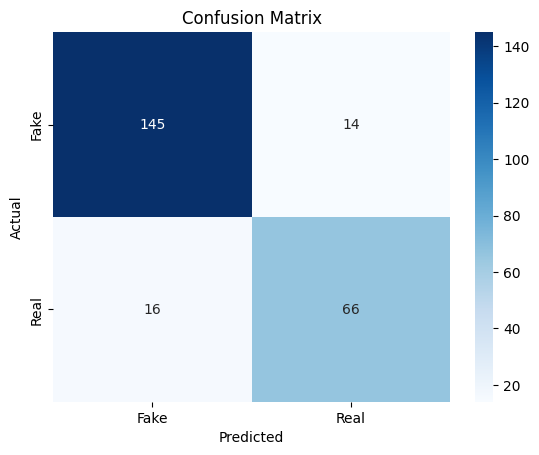

              precision    recall  f1-score   support

        Fake       0.90      0.91      0.91       159
        Real       0.82      0.80      0.81        82

    accuracy                           0.88       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.87      0.88      0.88       241



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Thu thập nhãn thực tế và nhãn dự đoán
y_true, y_pred = [], []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.cuda(), labels.cuda()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Hiển thị kết quả
plot_confusion_matrix(y_true, y_pred, classes=['Fake', 'Real'])
print(classification_report(y_true, y_pred, target_names=['Fake', 'Real']))
